In [1]:
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import models, Model
import numpy as np

# fancy graphics
plt.style.use('seaborn')
plt.tight_layout()

<Figure size 576x396 with 0 Axes>

## Plotting methods of training and validation loss

In [2]:
def plotLoss(losses, loss_fn, ep_first_phase=None):
    #Plotting the validation and training errors
    x_axis = range(1,len(losses['loss'])+1)

    if ep_first_phase is not None:
        plt.axvline(ep_first_phase, c='teal', linestyle='--', label='End of first training phase')
    plt.plot(x_axis, losses['loss'], label='Training loss', c='orange')
    plt.plot(x_axis, losses['val_loss'], label='Validation loss', linestyle='-.', c='brown', linewidth=2)

    plt.xlabel('Epochs')
    plt.ylabel(loss_fn)
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [3]:
def plotAll(experiments, dropout_policies=None): # argument is list with hyperparams and train/val losses
    fig, axes = plt.subplots(1,len(experiments), sharey=True, figsize=(12,12))
    axes = axes.ravel()

    for i,(ax,exp) in enumerate(zip(axes,experiments)):
        ax.yaxis.set_tick_params(labelbottom=True)
        x_axis = range(1,exp['ep']+1)
        ax.plot(x_axis, exp['loss'], label='Training loss', c='orange')
        ax.plot(x_axis, exp['val_loss'], label='Validation loss', linestyle='-.', c='brown', linewidth=2)
        ax.axvline(exp['secPhase'], c='teal', linestyle='--', label='End of first training phase')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Cross Entropy')
        ttl = f'Epochs: {exp["ep"]}\nBatch Size: {exp["bSz"]}\nFully Conn Layer Nodes: {exp["fc"]}\n'
        if dropout_policies is not None:
            if dropout_policies[i] == 'no_drop':
                ttl += 'No Dropout'
            elif dropout_policies[i] == 'drop_conv':
                ttl += 'Dropout after Convolution Layers'
            elif dropout_policies[i] == 'drop_fc':
                ttl += 'Dropout after Fully Connected Layer'
            else:
                ttl += 'Dropout after Convolution and Fully Connected Layers'
        ax.set_title(ttl)


    plt.legend()
    plt.show()

### Paths

In [4]:
models_dir = 'classifier_models/'

# files with models
fc32_fname = 'fc32.h5'
fc64_fname = 'fc64.h5'
fc128_fname = 'fc128.h5'
fc256_fname = 'fc256.h5'

# files with json info
fc32_inf_fname = 'fc32.json'
fc64_inf_fname = 'fc64.json'
fc128_inf_fname = 'fc128.json'
fc256_inf_fname = 'fc256.json'

# Research upon number of neurons in fully connected layer

## All models below were trained with batches of size 64 and dropout was used after convolution layers and after the fully connected layer with probability to drop neuron 0.2 and 0.5 respectively

## 1) 32 neurons in fully connected layer

### Architecture

In [5]:
model = models.load_model(models_dir + fc32_fname, compile= False)
model.summary()

Model: "N2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64       

### Training of fully connected layer's weights

In [6]:
fc_train = \
'''
Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: 1.7685 - val_loss: 1.3544
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 1.4575 - val_loss: 1.4902
Epoch 3/100
750/750 [==============================] - 2s 2ms/step - loss: 1.3746 - val_loss: 1.3343
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 1.3193 - val_loss: 1.2406
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 1.2642 - val_loss: 1.3542
Epoch 6/100
750/750 [==============================] - 2s 2ms/step - loss: 1.2181 - val_loss: 1.3664
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1963 - val_loss: 1.0587
Epoch 8/100
750/750 [==============================] - 2s 2ms/step - loss: 1.1837 - val_loss: 1.3504
Epoch 9/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1764 - val_loss: 0.9488
Epoch 10/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1663 - val_loss: 0.9144
Epoch 11/100
750/750 [==============================] - 2s 2ms/step - loss: 1.1668 - val_loss: 1.0289
Epoch 12/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1491 - val_loss: 1.0156
Epoch 13/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1437 - val_loss: 0.9339
Epoch 14/100
750/750 [==============================] - 2s 2ms/step - loss: 1.1425 - val_loss: 1.1258
Epoch 15/100
750/750 [==============================] - 2s 2ms/step - loss: 1.1296 - val_loss: 0.9685
Epoch 16/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1239 - val_loss: 1.1016
Epoch 17/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1193 - val_loss: 1.0421
Epoch 18/100
750/750 [==============================] - 2s 2ms/step - loss: 1.1206 - val_loss: 0.9012
Epoch 19/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1190 - val_loss: 0.8649
Epoch 20/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1205 - val_loss: 0.8230
Epoch 21/100
750/750 [==============================] - 2s 2ms/step - loss: 1.1164 - val_loss: 0.8718
Epoch 22/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1186 - val_loss: 0.8879
Epoch 23/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1150 - val_loss: 0.7928
Epoch 24/100
750/750 [==============================] - 2s 2ms/step - loss: 1.1167 - val_loss: 0.8661
Epoch 25/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1175 - val_loss: 0.8623
Epoch 26/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1070 - val_loss: 0.8167
Epoch 27/100
750/750 [==============================] - 2s 2ms/step - loss: 1.1103 - val_loss: 0.8099
Epoch 28/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1054 - val_loss: 0.7610
Epoch 29/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1002 - val_loss: 0.8884
Epoch 30/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1055 - val_loss: 0.8588
Epoch 31/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1070 - val_loss: 0.8777
Epoch 32/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1126 - val_loss: 0.7515
Epoch 33/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1030 - val_loss: 0.8103
Epoch 34/100
750/750 [==============================] - 2s 2ms/step - loss: 1.1052 - val_loss: 0.7519
Epoch 35/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1126 - val_loss: 0.8628
Epoch 36/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1010 - val_loss: 0.8891
Epoch 37/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1049 - val_loss: 0.8427
Epoch 38/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1012 - val_loss: 0.8438
Epoch 39/100
750/750 [==============================] - 2s 2ms/step - loss: 1.1069 - val_loss: 0.8195
Epoch 40/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0991 - val_loss: 0.8740
Epoch 41/100
750/750 [==============================] - 2s 3ms/step - loss: 1.1049 - val_loss: 0.8541
Epoch 42/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0894 - val_loss: 0.8210
Epoch 43/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0969 - val_loss: 0.7620
Epoch 44/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0959 - val_loss: 0.8154
Epoch 45/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0955 - val_loss: 0.8176
Epoch 46/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0922 - val_loss: 0.8107
Epoch 47/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0925 - val_loss: 0.8414
Epoch 48/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0973 - val_loss: 0.8286
Epoch 49/100
750/750 [==============================] - 2s 2ms/step - loss: 1.1073 - val_loss: 0.8706
Epoch 50/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0997 - val_loss: 0.8822
Epoch 51/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0976 - val_loss: 0.7693
Epoch 52/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0922 - val_loss: 0.7622
Epoch 53/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0955 - val_loss: 0.8354
Epoch 54/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0862 - val_loss: 0.7996
Epoch 55/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0908 - val_loss: 0.8542
Epoch 56/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0902 - val_loss: 0.8127
Epoch 57/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0992 - val_loss: 0.7822
Epoch 58/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0834 - val_loss: 0.8013
Epoch 59/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0945 - val_loss: 0.7515
Epoch 60/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0908 - val_loss: 0.7718
Epoch 61/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0900 - val_loss: 0.7888
Epoch 62/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0914 - val_loss: 0.8052
Epoch 63/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0868 - val_loss: 0.7543
Epoch 64/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0933 - val_loss: 0.7823
Epoch 65/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0848 - val_loss: 0.8096
Epoch 66/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0801 - val_loss: 0.8714
Epoch 67/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0888 - val_loss: 0.8316
Epoch 68/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0872 - val_loss: 0.8360
Epoch 69/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0863 - val_loss: 0.8208
Epoch 70/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0911 - val_loss: 0.7664
Epoch 71/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0809 - val_loss: 0.7528
Epoch 72/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0876 - val_loss: 0.7353
Epoch 73/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0873 - val_loss: 0.7543
Epoch 74/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0889 - val_loss: 0.7451
Epoch 75/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0862 - val_loss: 0.7357
Epoch 76/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0851 - val_loss: 0.7959
Epoch 77/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0793 - val_loss: 0.7136
Epoch 78/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0800 - val_loss: 0.7850
Epoch 79/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0884 - val_loss: 0.7855
Epoch 80/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0897 - val_loss: 0.7712
Epoch 81/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0866 - val_loss: 0.8020
Epoch 82/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0926 - val_loss: 0.8071
Epoch 83/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0851 - val_loss: 0.7707
Epoch 84/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0924 - val_loss: 0.8744
Epoch 85/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0883 - val_loss: 0.8055
Epoch 86/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0842 - val_loss: 0.8063
Epoch 87/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0870 - val_loss: 0.8339
Epoch 88/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0930 - val_loss: 0.8380
Epoch 89/100
750/750 [==============================] - 2s 2ms/step - loss: 1.0907 - val_loss: 0.8403
Epoch 90/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0869 - val_loss: 0.7810
Epoch 91/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0805 - val_loss: 0.7707
Epoch 92/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0827 - val_loss: 0.7938
Epoch 93/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0845 - val_loss: 0.8263
Epoch 94/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0794 - val_loss: 0.8226
Epoch 95/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0803 - val_loss: 0.7532
Epoch 96/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0825 - val_loss: 0.7399
Epoch 97/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0856 - val_loss: 0.7901
Epoch 98/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0850 - val_loss: 0.8194
Epoch 99/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0810 - val_loss: 0.7608
Epoch 100/100
750/750 [==============================] - 2s 3ms/step - loss: 1.0855 - val_loss: 0.8192
'''

### Training of all weights

In [7]:
all_train = \
'''
Epoch 1/100
750/750 [==============================] - 4s 5ms/step - loss: 0.9925 - val_loss: 0.4469
Epoch 2/100
750/750 [==============================] - 4s 5ms/step - loss: 0.9079 - val_loss: 0.3616
Epoch 3/100
750/750 [==============================] - 3s 4ms/step - loss: 0.8702 - val_loss: 0.2920
Epoch 4/100
750/750 [==============================] - 4s 5ms/step - loss: 0.8404 - val_loss: 0.2864
Epoch 5/100
750/750 [==============================] - 3s 5ms/step - loss: 0.8079 - val_loss: 0.2652
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.7600 - val_loss: 0.2131
Epoch 7/100
750/750 [==============================] - 3s 5ms/step - loss: 0.6758 - val_loss: 0.2494
Epoch 8/100
750/750 [==============================] - 3s 5ms/step - loss: 0.6573 - val_loss: 0.2206
Epoch 9/100
750/750 [==============================] - 3s 5ms/step - loss: 0.6253 - val_loss: 0.1825
Epoch 10/100
750/750 [==============================] - 3s 5ms/step - loss: 0.5637 - val_loss: 0.2018
Epoch 11/100
750/750 [==============================] - 3s 5ms/step - loss: 0.5129 - val_loss: 0.1801
Epoch 12/100
750/750 [==============================] - 3s 5ms/step - loss: 0.4551 - val_loss: 0.1351
Epoch 13/100
750/750 [==============================] - 3s 5ms/step - loss: 0.4249 - val_loss: 0.1416
Epoch 14/100
750/750 [==============================] - 3s 5ms/step - loss: 0.4001 - val_loss: 0.1248
Epoch 15/100
750/750 [==============================] - 3s 5ms/step - loss: 0.3761 - val_loss: 0.1153
Epoch 16/100
750/750 [==============================] - 3s 5ms/step - loss: 0.3540 - val_loss: 0.1103
Epoch 17/100
750/750 [==============================] - 4s 5ms/step - loss: 0.3040 - val_loss: 0.1075
Epoch 18/100
750/750 [==============================] - 3s 5ms/step - loss: 0.2750 - val_loss: 0.1253
Epoch 19/100
750/750 [==============================] - 4s 5ms/step - loss: 0.2658 - val_loss: 0.2372
Epoch 20/100
750/750 [==============================] - 4s 5ms/step - loss: 0.2575 - val_loss: 0.1330
Epoch 21/100
750/750 [==============================] - 4s 5ms/step - loss: 0.2314 - val_loss: 0.0819
Epoch 22/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1969 - val_loss: 0.1104
Epoch 23/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1755 - val_loss: 0.1208
Epoch 24/100
750/750 [==============================] - 3s 5ms/step - loss: 0.1714 - val_loss: 0.0937
Epoch 25/100
750/750 [==============================] - 4s 5ms/step - loss: 0.1653 - val_loss: 0.1239
Epoch 26/100
750/750 [==============================] - 3s 5ms/step - loss: 0.1633 - val_loss: 0.0928
Epoch 27/100
750/750 [==============================] - 3s 5ms/step - loss: 0.1492 - val_loss: 0.0830
Epoch 28/100
750/750 [==============================] - 3s 5ms/step - loss: 0.1357 - val_loss: 0.0997
Epoch 29/100
750/750 [==============================] - 3s 5ms/step - loss: 0.1213 - val_loss: 0.0750
Epoch 30/100
750/750 [==============================] - 3s 5ms/step - loss: 0.1187 - val_loss: 0.0920
Epoch 31/100
750/750 [==============================] - 3s 5ms/step - loss: 0.1122 - val_loss: 0.0671
Epoch 32/100
750/750 [==============================] - 3s 5ms/step - loss: 0.1055 - val_loss: 0.0780
Epoch 33/100
750/750 [==============================] - 3s 5ms/step - loss: 0.1028 - val_loss: 0.0859
Epoch 34/100
750/750 [==============================] - 3s 5ms/step - loss: 0.1013 - val_loss: 0.1081
Epoch 35/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0905 - val_loss: 0.0730
Epoch 36/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0896 - val_loss: 0.0736
Epoch 37/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0924 - val_loss: 0.0817
Epoch 38/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0818 - val_loss: 0.0884
Epoch 39/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0824 - val_loss: 0.0800
Epoch 40/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0784 - val_loss: 0.0988
Epoch 41/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0766 - val_loss: 0.1985
Epoch 42/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0736 - val_loss: 0.0888
Epoch 43/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0740 - val_loss: 0.0793
Epoch 44/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0767 - val_loss: 0.0921
Epoch 45/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0703 - val_loss: 0.0640
Epoch 46/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0654 - val_loss: 0.0692
Epoch 47/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0656 - val_loss: 0.0643
Epoch 48/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0645 - val_loss: 0.0728
Epoch 49/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0593 - val_loss: 0.0929
Epoch 50/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0621 - val_loss: 0.0743
Epoch 51/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0601 - val_loss: 0.0873
Epoch 52/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0554 - val_loss: 0.0787
Epoch 53/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0622 - val_loss: 0.0802
Epoch 54/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0599 - val_loss: 0.0643
Epoch 55/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0542 - val_loss: 0.0641
Epoch 56/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0561 - val_loss: 0.0757
Epoch 57/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0490 - val_loss: 0.0752
Epoch 58/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0535 - val_loss: 0.0679
Epoch 59/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0547 - val_loss: 0.0997
Epoch 60/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0553 - val_loss: 0.0600
Epoch 61/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0519 - val_loss: 0.0781
Epoch 62/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0544 - val_loss: 0.0620
Epoch 63/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0514 - val_loss: 0.0893
Epoch 64/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0536 - val_loss: 0.0946
Epoch 65/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0514 - val_loss: 0.1071
Epoch 66/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0492 - val_loss: 0.0761
Epoch 67/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0516 - val_loss: 0.1014
Epoch 68/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0487 - val_loss: 0.0792
Epoch 69/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0462 - val_loss: 0.0862
Epoch 70/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0520 - val_loss: 0.1259
Epoch 71/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0468 - val_loss: 0.0800
Epoch 72/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0486 - val_loss: 0.0808
Epoch 73/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0501 - val_loss: 0.1332
Epoch 74/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0492 - val_loss: 0.0900
Epoch 75/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0455 - val_loss: 0.0738
Epoch 76/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0480 - val_loss: 0.1045
Epoch 77/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0448 - val_loss: 0.0724
Epoch 78/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0469 - val_loss: 0.0905
Epoch 79/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0487 - val_loss: 0.0748
Epoch 80/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0454 - val_loss: 0.0619
Epoch 81/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0460 - val_loss: 0.0877
Epoch 82/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0432 - val_loss: 0.0718
Epoch 83/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0423 - val_loss: 0.0510
Epoch 84/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0434 - val_loss: 0.1150
Epoch 85/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0441 - val_loss: 0.0787
Epoch 86/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0450 - val_loss: 0.0895
Epoch 87/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0439 - val_loss: 0.0775
Epoch 88/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0446 - val_loss: 0.0873
Epoch 89/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0437 - val_loss: 0.0820
Epoch 90/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0449 - val_loss: 0.0850
Epoch 91/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0436 - val_loss: 0.0884
Epoch 92/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0430 - val_loss: 0.0832
Epoch 93/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0422 - val_loss: 0.0905
Epoch 94/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0432 - val_loss: 0.0997
Epoch 95/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0470 - val_loss: 0.0853
Epoch 96/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0457 - val_loss: 0.0694
Epoch 97/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0419 - val_loss: 0.0708
Epoch 98/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0405 - val_loss: 0.0831
Epoch 99/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0440 - val_loss: 0.0732
Epoch 100/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0385 - val_loss: 0.0871
'''

## 2) 64 neurons in fully connected layer

### Architecture

In [8]:
model = models.load_model(models_dir + fc64_fname, compile= False)
model.summary()

Model: "N2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
dropout_12 (Dropout)         (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
dropout_13 (Dropout)         (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64       

### Training of fully connected layer's weights

In [9]:
fc_train = \
'''
Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: 0.1238 - val_loss: 0.0418
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0387 - val_loss: 0.0373
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0287 - val_loss: 0.0385
Epoch 4/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0235 - val_loss: 0.0387
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0215 - val_loss: 0.0396
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0206 - val_loss: 0.0396
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0177 - val_loss: 0.0412
Epoch 8/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0159 - val_loss: 0.0394
Epoch 9/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0154 - val_loss: 0.0406
Epoch 10/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0148 - val_loss: 0.0461
Epoch 11/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0156 - val_loss: 0.0438
Epoch 12/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0130 - val_loss: 0.0487
Epoch 13/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0139 - val_loss: 0.0459
Epoch 14/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0144 - val_loss: 0.0478
Epoch 15/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0141 - val_loss: 0.0488
Epoch 16/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0122 - val_loss: 0.0512
Epoch 17/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0128 - val_loss: 0.0483
Epoch 18/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0119 - val_loss: 0.0492
Epoch 19/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0111 - val_loss: 0.0517
Epoch 20/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0118 - val_loss: 0.0539
Epoch 21/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0107 - val_loss: 0.0531
Epoch 22/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0112 - val_loss: 0.0539
Epoch 23/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0110 - val_loss: 0.0564
Epoch 24/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0112 - val_loss: 0.0553
Epoch 25/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0106 - val_loss: 0.0603
Epoch 26/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0114 - val_loss: 0.0557
Epoch 27/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0107 - val_loss: 0.0549
Epoch 28/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0102 - val_loss: 0.0576
Epoch 29/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0113 - val_loss: 0.0589
Epoch 30/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0112 - val_loss: 0.0581
Epoch 31/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0097 - val_loss: 0.0572
Epoch 32/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0100 - val_loss: 0.0622
Epoch 33/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0100 - val_loss: 0.0601
Epoch 34/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0091 - val_loss: 0.0631
Epoch 35/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0106 - val_loss: 0.0602
Epoch 36/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0099 - val_loss: 0.0649
Epoch 37/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0112 - val_loss: 0.0621
Epoch 38/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0099 - val_loss: 0.0631
Epoch 39/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0103 - val_loss: 0.0615
Epoch 40/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0094 - val_loss: 0.0653
Epoch 41/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0094 - val_loss: 0.0687
Epoch 42/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0098 - val_loss: 0.0671
Epoch 43/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0109 - val_loss: 0.0714
Epoch 44/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0106 - val_loss: 0.0685
Epoch 45/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0101 - val_loss: 0.0646
Epoch 46/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0102 - val_loss: 0.0646
Epoch 47/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0106 - val_loss: 0.0662
Epoch 48/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0111 - val_loss: 0.0672
Epoch 49/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0096 - val_loss: 0.0693
Epoch 50/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0101 - val_loss: 0.0684
Epoch 51/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0103 - val_loss: 0.0740
Epoch 52/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0090 - val_loss: 0.0731
Epoch 53/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0096 - val_loss: 0.0680
Epoch 54/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0088 - val_loss: 0.0698
Epoch 55/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0086 - val_loss: 0.0759
Epoch 56/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0106 - val_loss: 0.0751
Epoch 57/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0103 - val_loss: 0.0761
Epoch 58/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0101 - val_loss: 0.0733
Epoch 59/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0091 - val_loss: 0.0772
Epoch 60/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0092 - val_loss: 0.0763
Epoch 61/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0089 - val_loss: 0.0809
Epoch 62/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0092 - val_loss: 0.0767
Epoch 63/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0098 - val_loss: 0.0752
Epoch 64/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0085 - val_loss: 0.0815
Epoch 65/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0094 - val_loss: 0.0765
Epoch 66/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0095 - val_loss: 0.0818
Epoch 67/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0086 - val_loss: 0.0837
Epoch 68/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0102 - val_loss: 0.0807
Epoch 69/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0101 - val_loss: 0.0866
Epoch 70/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0096 - val_loss: 0.0812
Epoch 71/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0106 - val_loss: 0.0772
Epoch 72/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0096 - val_loss: 0.0832
Epoch 73/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0109 - val_loss: 0.0807
Epoch 74/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0109 - val_loss: 0.0834
Epoch 75/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0094 - val_loss: 0.0869
Epoch 76/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0093 - val_loss: 0.0827
Epoch 77/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0097 - val_loss: 0.0864
Epoch 78/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0097 - val_loss: 0.0877
Epoch 79/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0091 - val_loss: 0.0865
Epoch 80/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0088 - val_loss: 0.0856
Epoch 81/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0092 - val_loss: 0.0803
Epoch 82/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0088 - val_loss: 0.0874
Epoch 83/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0100 - val_loss: 0.0873
Epoch 84/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0082 - val_loss: 0.0844
Epoch 85/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0103 - val_loss: 0.0820
Epoch 86/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0088 - val_loss: 0.0879
Epoch 87/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0087 - val_loss: 0.0879
Epoch 88/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0119 - val_loss: 0.0865
Epoch 89/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0088 - val_loss: 0.0888
Epoch 90/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0087 - val_loss: 0.0922
Epoch 91/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0082 - val_loss: 0.0879
Epoch 92/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0086 - val_loss: 0.0940
Epoch 93/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0100 - val_loss: 0.0911
Epoch 94/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0103 - val_loss: 0.0878
Epoch 95/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0095 - val_loss: 0.0877
Epoch 96/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0082 - val_loss: 0.0915
Epoch 97/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0083 - val_loss: 0.0965
Epoch 98/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0094 - val_loss: 0.0882
Epoch 99/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0088 - val_loss: 0.0973
Epoch 100/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0106 - val_loss: 0.0934
'''

### Training of all weights

In [10]:
all_train = \
'''
Epoch 1/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0140 - val_loss: 0.0858
Epoch 2/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0164 - val_loss: 0.0968
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0182 - val_loss: 0.0725
Epoch 4/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0182 - val_loss: 0.0888
Epoch 5/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0141 - val_loss: 0.1010
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0152 - val_loss: 0.1757
Epoch 7/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0187 - val_loss: 0.1149
Epoch 8/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0158 - val_loss: 0.0866
Epoch 9/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0166 - val_loss: 0.1054
Epoch 10/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0166 - val_loss: 0.0891
Epoch 11/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0171 - val_loss: 0.1022
Epoch 12/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0151 - val_loss: 0.0944
Epoch 13/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0147 - val_loss: 0.0871
Epoch 14/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0159 - val_loss: 0.0769
Epoch 15/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0140 - val_loss: 0.0972
Epoch 16/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0126 - val_loss: 0.0809
Epoch 17/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0161 - val_loss: 0.1182
Epoch 18/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0160 - val_loss: 0.0915
Epoch 19/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0145 - val_loss: 0.1135
Epoch 20/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0143 - val_loss: 0.0751
Epoch 21/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0137 - val_loss: 0.1073
Epoch 22/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0154 - val_loss: 0.0595
Epoch 23/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0132 - val_loss: 0.1096
Epoch 24/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0126 - val_loss: 0.0901
Epoch 25/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0156 - val_loss: 0.0689
Epoch 26/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0161 - val_loss: 0.0950
Epoch 27/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0138 - val_loss: 0.1016
Epoch 28/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0133 - val_loss: 0.0603
Epoch 29/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0135 - val_loss: 0.0923
Epoch 30/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0128 - val_loss: 0.1100
Epoch 31/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0157 - val_loss: 0.0938
Epoch 32/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0159 - val_loss: 0.1127
Epoch 33/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0156 - val_loss: 0.1108
Epoch 34/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0113 - val_loss: 0.0841
Epoch 35/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0164 - val_loss: 0.0922
Epoch 36/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0131 - val_loss: 0.1045
Epoch 37/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0128 - val_loss: 0.1116
Epoch 38/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0176 - val_loss: 0.0887
Epoch 39/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0134 - val_loss: 0.0472
Epoch 40/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0125 - val_loss: 0.0728
Epoch 41/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0157 - val_loss: 0.1059
Epoch 42/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0129 - val_loss: 0.0805
Epoch 43/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0142 - val_loss: 0.0994
Epoch 44/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0137 - val_loss: 0.0804
Epoch 45/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0130 - val_loss: 0.0907
Epoch 46/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0120 - val_loss: 0.0879
Epoch 47/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0146 - val_loss: 0.0880
Epoch 48/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0134 - val_loss: 0.0876
Epoch 49/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0131 - val_loss: 0.0600
Epoch 50/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0108 - val_loss: 0.0673
Epoch 51/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0118 - val_loss: 0.1042
Epoch 52/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0145 - val_loss: 0.0760
Epoch 53/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0134 - val_loss: 0.0956
Epoch 54/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0123 - val_loss: 0.0739
Epoch 55/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0125 - val_loss: 0.1031
Epoch 56/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0107 - val_loss: 0.0747
Epoch 57/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0130 - val_loss: 0.1000
Epoch 58/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0122 - val_loss: 0.0879
Epoch 59/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0151 - val_loss: 0.0959
Epoch 60/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0124 - val_loss: 0.0983
Epoch 61/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0104 - val_loss: 0.1220
Epoch 62/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0131 - val_loss: 0.1206
Epoch 63/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0149 - val_loss: 0.0861
Epoch 64/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0144 - val_loss: 0.0931
Epoch 65/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0123 - val_loss: 0.0925
Epoch 66/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0111 - val_loss: 0.1183
Epoch 67/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0135 - val_loss: 0.0637
Epoch 68/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0129 - val_loss: 0.0770
Epoch 69/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0145 - val_loss: 0.0613
Epoch 70/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0129 - val_loss: 0.0911
Epoch 71/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0144 - val_loss: 0.0499
Epoch 72/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0141 - val_loss: 0.0817
Epoch 73/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0141 - val_loss: 0.0622
Epoch 74/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0108 - val_loss: 0.0591
Epoch 75/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0112 - val_loss: 0.0813
Epoch 76/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0125 - val_loss: 0.0871
Epoch 77/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0124 - val_loss: 0.0967
Epoch 78/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0119 - val_loss: 0.0811
Epoch 79/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0143 - val_loss: 0.0782
Epoch 80/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0132 - val_loss: 0.1003
Epoch 81/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0101 - val_loss: 0.1080
Epoch 82/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0125 - val_loss: 0.0983
Epoch 83/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0115 - val_loss: 0.0966
Epoch 84/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0126 - val_loss: 0.1026
Epoch 85/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0140 - val_loss: 0.0796
Epoch 86/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0112 - val_loss: 0.1220
Epoch 87/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0129 - val_loss: 0.0671
Epoch 88/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0104 - val_loss: 0.0558
Epoch 89/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0117 - val_loss: 0.1167
Epoch 90/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0114 - val_loss: 0.0567
Epoch 91/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0134 - val_loss: 0.0895
Epoch 92/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0124 - val_loss: 0.1161
Epoch 93/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0112 - val_loss: 0.0606
Epoch 94/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0117 - val_loss: 0.0668
Epoch 95/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0121 - val_loss: 0.0835
Epoch 96/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0126 - val_loss: 0.0976
Epoch 97/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0128 - val_loss: 0.0953
Epoch 98/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0115 - val_loss: 0.0941
Epoch 99/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0098 - val_loss: 0.0818
Epoch 100/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0096 - val_loss: 0.0908
'''

## 3) 128 neurons in fully connected layer

### Architecture

In [11]:
model = models.load_model(models_dir + fc128_fname, compile= False)
model.summary()

Model: "N2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64       

### Training of fully connected layer's weights

In [12]:
fc_train = \
'''
Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0710 - val_loss: 0.0425
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0285 - val_loss: 0.0442
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0226 - val_loss: 0.0430
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0215 - val_loss: 0.0483
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0195 - val_loss: 0.0544
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0181 - val_loss: 0.0484
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0167 - val_loss: 0.0496
Epoch 8/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0156 - val_loss: 0.0556
Epoch 9/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0145 - val_loss: 0.0533
Epoch 10/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0146 - val_loss: 0.0542
Epoch 11/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0144 - val_loss: 0.0588
Epoch 12/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0161 - val_loss: 0.0599
Epoch 13/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0152 - val_loss: 0.0612
Epoch 14/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0155 - val_loss: 0.0641
Epoch 15/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0129 - val_loss: 0.0726
Epoch 16/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0124 - val_loss: 0.0769
Epoch 17/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0134 - val_loss: 0.0750
Epoch 18/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0132 - val_loss: 0.0677
Epoch 19/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0136 - val_loss: 0.0673
Epoch 20/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0123 - val_loss: 0.0703
Epoch 21/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0147 - val_loss: 0.0698
Epoch 22/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0116 - val_loss: 0.0777
Epoch 23/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0133 - val_loss: 0.0709
Epoch 24/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0093 - val_loss: 0.0804
Epoch 25/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0109 - val_loss: 0.0844
Epoch 26/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0119 - val_loss: 0.0896
Epoch 27/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0121 - val_loss: 0.0860
Epoch 28/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0105 - val_loss: 0.0832
Epoch 29/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0098 - val_loss: 0.0919
Epoch 30/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0106 - val_loss: 0.0918
Epoch 31/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0120 - val_loss: 0.0945
Epoch 32/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0117 - val_loss: 0.0927
Epoch 33/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0112 - val_loss: 0.0945
Epoch 34/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0123 - val_loss: 0.0995
Epoch 35/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0097 - val_loss: 0.0980
Epoch 36/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0112 - val_loss: 0.1008
Epoch 37/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0106 - val_loss: 0.1018
Epoch 38/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0104 - val_loss: 0.1132
Epoch 39/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0121 - val_loss: 0.1001
Epoch 40/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0129 - val_loss: 0.1043
Epoch 41/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0114 - val_loss: 0.1095
Epoch 42/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0128 - val_loss: 0.1084
Epoch 43/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0128 - val_loss: 0.1112
Epoch 44/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0102 - val_loss: 0.1037
Epoch 45/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0113 - val_loss: 0.1096
Epoch 46/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0091 - val_loss: 0.1070
Epoch 47/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0119 - val_loss: 0.1095
Epoch 48/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0113 - val_loss: 0.1093
Epoch 49/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0104 - val_loss: 0.1036
Epoch 50/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0110 - val_loss: 0.1078
Epoch 51/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0098 - val_loss: 0.1162
Epoch 52/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0093 - val_loss: 0.1103
Epoch 53/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0104 - val_loss: 0.1187
Epoch 54/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0106 - val_loss: 0.1159
Epoch 55/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0114 - val_loss: 0.1230
Epoch 56/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0107 - val_loss: 0.1190
Epoch 57/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0099 - val_loss: 0.1367
Epoch 58/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0105 - val_loss: 0.1275
Epoch 59/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0113 - val_loss: 0.1315
Epoch 60/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0089 - val_loss: 0.1313
Epoch 61/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0107 - val_loss: 0.1322
Epoch 62/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0107 - val_loss: 0.1214
Epoch 63/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0103 - val_loss: 0.1234
Epoch 64/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0117 - val_loss: 0.1184
Epoch 65/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0092 - val_loss: 0.1289
Epoch 66/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0107 - val_loss: 0.1343
Epoch 67/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0124 - val_loss: 0.1281
Epoch 68/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0104 - val_loss: 0.1301
Epoch 69/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0112 - val_loss: 0.1347
Epoch 70/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0086 - val_loss: 0.1355
Epoch 71/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0104 - val_loss: 0.1350
Epoch 72/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0093 - val_loss: 0.1346
Epoch 73/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0082 - val_loss: 0.1363
Epoch 74/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0095 - val_loss: 0.1288
Epoch 75/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0116 - val_loss: 0.1346
Epoch 76/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0106 - val_loss: 0.1301
Epoch 77/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0118 - val_loss: 0.1363
Epoch 78/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0129 - val_loss: 0.1349
Epoch 79/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0109 - val_loss: 0.1464
Epoch 80/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0105 - val_loss: 0.1397
Epoch 81/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0091 - val_loss: 0.1369
Epoch 82/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0107 - val_loss: 0.1415
Epoch 83/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0092 - val_loss: 0.1329
Epoch 84/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0111 - val_loss: 0.1269
Epoch 85/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0122 - val_loss: 0.1308
Epoch 86/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0098 - val_loss: 0.1395
Epoch 87/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0139 - val_loss: 0.1366
Epoch 88/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0097 - val_loss: 0.1425
Epoch 89/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0099 - val_loss: 0.1478
Epoch 90/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0101 - val_loss: 0.1426
Epoch 91/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0107 - val_loss: 0.1451
Epoch 92/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0112 - val_loss: 0.1444
Epoch 93/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0102 - val_loss: 0.1520
Epoch 94/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0099 - val_loss: 0.1485
Epoch 95/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0098 - val_loss: 0.1502
Epoch 96/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0099 - val_loss: 0.1577
Epoch 97/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0098 - val_loss: 0.1614
Epoch 98/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0085 - val_loss: 0.1702
Epoch 99/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0124 - val_loss: 0.1640
Epoch 100/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0105 - val_loss: 0.1664
'''

### Training of all weights

In [13]:
all_train = \
'''
Epoch 1/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0179 - val_loss: 0.1511
Epoch 2/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0192 - val_loss: 0.1455
Epoch 3/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0238 - val_loss: 0.1618
Epoch 4/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0198 - val_loss: 0.1539
Epoch 5/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0196 - val_loss: 0.1629
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0168 - val_loss: 0.1378
Epoch 7/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0189 - val_loss: 0.1135
Epoch 8/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0194 - val_loss: 0.1490
Epoch 9/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0193 - val_loss: 0.1544
Epoch 10/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0189 - val_loss: 0.1328
Epoch 11/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0163 - val_loss: 0.1321
Epoch 12/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0163 - val_loss: 0.1056
Epoch 13/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0162 - val_loss: 0.0798
Epoch 14/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0183 - val_loss: 0.1176
Epoch 15/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0194 - val_loss: 0.0947
Epoch 16/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0153 - val_loss: 0.1428
Epoch 17/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0162 - val_loss: 0.1043
Epoch 18/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0167 - val_loss: 0.1272
Epoch 19/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0171 - val_loss: 0.0779
Epoch 20/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0159 - val_loss: 0.0722
Epoch 21/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0162 - val_loss: 0.0897
Epoch 22/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0144 - val_loss: 0.0917
Epoch 23/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0155 - val_loss: 0.0914
Epoch 24/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0138 - val_loss: 0.1305
Epoch 25/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0127 - val_loss: 0.0983
Epoch 26/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0133 - val_loss: 0.0847
Epoch 27/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0127 - val_loss: 0.0729
Epoch 28/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0133 - val_loss: 0.0829
Epoch 29/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0142 - val_loss: 0.0873
Epoch 30/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0125 - val_loss: 0.1218
Epoch 31/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0156 - val_loss: 0.0673
Epoch 32/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0138 - val_loss: 0.1220
Epoch 33/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0147 - val_loss: 0.1154
Epoch 34/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0160 - val_loss: 0.0587
Epoch 35/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0150 - val_loss: 0.0630
Epoch 36/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0141 - val_loss: 0.1098
Epoch 37/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0112 - val_loss: 0.1065
Epoch 38/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0132 - val_loss: 0.0817
Epoch 39/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0126 - val_loss: 0.0532
Epoch 40/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0106 - val_loss: 0.0691
Epoch 41/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0126 - val_loss: 0.1255
Epoch 42/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0108 - val_loss: 0.1129
Epoch 43/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0147 - val_loss: 0.1159
Epoch 44/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0119 - val_loss: 0.0927
Epoch 45/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0124 - val_loss: 0.0863
Epoch 46/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0130 - val_loss: 0.0602
Epoch 47/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0115 - val_loss: 0.0559
Epoch 48/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0127 - val_loss: 0.0887
Epoch 49/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0109 - val_loss: 0.0930
Epoch 50/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0114 - val_loss: 0.1177
Epoch 51/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0133 - val_loss: 0.0650
Epoch 52/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0138 - val_loss: 0.0877
Epoch 53/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0107 - val_loss: 0.0680
Epoch 54/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0104 - val_loss: 0.0806
Epoch 55/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0108 - val_loss: 0.1409
Epoch 56/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0111 - val_loss: 0.0675
Epoch 57/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0122 - val_loss: 0.1317
Epoch 58/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0110 - val_loss: 0.1273
Epoch 59/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0129 - val_loss: 0.0898
Epoch 60/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0112 - val_loss: 0.1038
Epoch 61/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0107 - val_loss: 0.1339
Epoch 62/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0134 - val_loss: 0.0651
Epoch 63/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0111 - val_loss: 0.0763
Epoch 64/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0101 - val_loss: 0.0888
Epoch 65/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0110 - val_loss: 0.1132
Epoch 66/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0126 - val_loss: 0.1090
Epoch 67/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0113 - val_loss: 0.0828
Epoch 68/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0118 - val_loss: 0.0657
Epoch 69/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0106 - val_loss: 0.0945
Epoch 70/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0125 - val_loss: 0.1344
Epoch 71/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0122 - val_loss: 0.1140
Epoch 72/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0104 - val_loss: 0.0925
Epoch 73/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0086 - val_loss: 0.0857
Epoch 74/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0090 - val_loss: 0.0875
Epoch 75/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0106 - val_loss: 0.0924
Epoch 76/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0122 - val_loss: 0.0774
Epoch 77/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0108 - val_loss: 0.0850
Epoch 78/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0123 - val_loss: 0.0634
Epoch 79/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0115 - val_loss: 0.0666
Epoch 80/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0102 - val_loss: 0.0902
Epoch 81/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0098 - val_loss: 0.1320
Epoch 82/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0110 - val_loss: 0.0955
Epoch 83/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0095 - val_loss: 0.1045
Epoch 84/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0099 - val_loss: 0.0861
Epoch 85/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0107 - val_loss: 0.0877
Epoch 86/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0111 - val_loss: 0.1022
Epoch 87/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0117 - val_loss: 0.0784
Epoch 88/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0098 - val_loss: 0.0671
Epoch 89/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0109 - val_loss: 0.0965
Epoch 90/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0087 - val_loss: 0.1078
Epoch 91/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0098 - val_loss: 0.0786
Epoch 92/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0107 - val_loss: 0.0723
Epoch 93/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0119 - val_loss: 0.0906
Epoch 94/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0106 - val_loss: 0.0902
Epoch 95/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0092 - val_loss: 0.0660
Epoch 96/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0113 - val_loss: 0.0625
Epoch 97/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0091 - val_loss: 0.0853
Epoch 98/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0106 - val_loss: 0.0840
Epoch 99/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0102 - val_loss: 0.0809
Epoch 100/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0101 - val_loss: 0.1216
'''

## 4) 256 neurons in fully connected layer

### Architecture

In [14]:
model = models.load_model(models_dir + fc256_fname, compile= False)
model.summary()

Model: "N2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
dropout_18 (Dropout)         (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
dropout_19 (Dropout)         (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64       

### Training of fully connected layer's weights

In [15]:
fc_train = \
'''
Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0661 - val_loss: 0.0371
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0202 - val_loss: 0.0333
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0154 - val_loss: 0.0351
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0133 - val_loss: 0.0400
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0123 - val_loss: 0.0407
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0107 - val_loss: 0.0429
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0099 - val_loss: 0.0425
Epoch 8/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0093 - val_loss: 0.0476
Epoch 9/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0105 - val_loss: 0.0441
Epoch 10/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0100 - val_loss: 0.0417
Epoch 11/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0068 - val_loss: 0.0465
Epoch 12/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0086 - val_loss: 0.0470
Epoch 13/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0093 - val_loss: 0.0564
Epoch 14/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0092 - val_loss: 0.0463
Epoch 15/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0079 - val_loss: 0.0525
Epoch 16/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0070 - val_loss: 0.0532
Epoch 17/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0074 - val_loss: 0.0537
Epoch 18/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0064 - val_loss: 0.0566
Epoch 19/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0077 - val_loss: 0.0560
Epoch 20/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0067 - val_loss: 0.0539
Epoch 21/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0066 - val_loss: 0.0607
Epoch 22/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0065 - val_loss: 0.0556
Epoch 23/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0057 - val_loss: 0.0530
Epoch 24/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0068 - val_loss: 0.0615
Epoch 25/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0066 - val_loss: 0.0556
Epoch 26/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0071 - val_loss: 0.0547
Epoch 27/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0055 - val_loss: 0.0558
Epoch 28/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0059 - val_loss: 0.0581
Epoch 29/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0049 - val_loss: 0.0553
Epoch 30/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0066 - val_loss: 0.0565
Epoch 31/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0070 - val_loss: 0.0571
Epoch 32/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0056 - val_loss: 0.0604
Epoch 33/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0059 - val_loss: 0.0623
Epoch 34/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0055 - val_loss: 0.0667
Epoch 35/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0059 - val_loss: 0.0575
Epoch 36/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0046 - val_loss: 0.0631
Epoch 37/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0061 - val_loss: 0.0638
Epoch 38/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0058 - val_loss: 0.0643
Epoch 39/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0053 - val_loss: 0.0568
Epoch 40/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0051 - val_loss: 0.0660
Epoch 41/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0055 - val_loss: 0.0673
Epoch 42/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0051 - val_loss: 0.0660
Epoch 43/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0064 - val_loss: 0.0649
Epoch 44/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0058 - val_loss: 0.0692
Epoch 45/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0055 - val_loss: 0.0689
Epoch 46/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0057 - val_loss: 0.0696
Epoch 47/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0051 - val_loss: 0.0671
Epoch 48/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0050 - val_loss: 0.0725
Epoch 49/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0044 - val_loss: 0.0671
Epoch 50/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0042 - val_loss: 0.0694
Epoch 51/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0072 - val_loss: 0.0699
Epoch 52/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0057 - val_loss: 0.0726
Epoch 53/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0053 - val_loss: 0.0706
Epoch 54/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0053 - val_loss: 0.0784
Epoch 55/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0047 - val_loss: 0.0714
Epoch 56/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0055 - val_loss: 0.0752
Epoch 57/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0053 - val_loss: 0.0752
Epoch 58/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0054 - val_loss: 0.0738
Epoch 59/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0050 - val_loss: 0.0726
Epoch 60/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0061 - val_loss: 0.0750
Epoch 61/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0057 - val_loss: 0.0711
Epoch 62/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0044 - val_loss: 0.0733
Epoch 63/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0054 - val_loss: 0.0788
Epoch 64/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0057 - val_loss: 0.0764
Epoch 65/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0051 - val_loss: 0.0800
Epoch 66/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0047 - val_loss: 0.0770
Epoch 67/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0040 - val_loss: 0.0833
Epoch 68/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0058 - val_loss: 0.0747
Epoch 69/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0052 - val_loss: 0.0709
Epoch 70/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0054 - val_loss: 0.0731
Epoch 71/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0052 - val_loss: 0.0760
Epoch 72/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0050 - val_loss: 0.0809
Epoch 73/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0057 - val_loss: 0.0784
Epoch 74/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0037 - val_loss: 0.0806
Epoch 75/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0046 - val_loss: 0.0823
Epoch 76/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0055 - val_loss: 0.0758
Epoch 77/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0039 - val_loss: 0.0793
Epoch 78/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0062 - val_loss: 0.0743
Epoch 79/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0045 - val_loss: 0.0802
Epoch 80/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0059 - val_loss: 0.0811
Epoch 81/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0058 - val_loss: 0.0802
Epoch 82/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0045 - val_loss: 0.0801
Epoch 83/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0041 - val_loss: 0.0832
Epoch 84/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0041 - val_loss: 0.0828
Epoch 85/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0043 - val_loss: 0.0831
Epoch 86/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0046 - val_loss: 0.0847
Epoch 87/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0048 - val_loss: 0.0862
Epoch 88/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0047 - val_loss: 0.0868
Epoch 89/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0047 - val_loss: 0.0868
Epoch 90/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0051 - val_loss: 0.0874
Epoch 91/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0047 - val_loss: 0.0877
Epoch 92/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0064 - val_loss: 0.0833
Epoch 93/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0045 - val_loss: 0.0914
Epoch 94/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0045 - val_loss: 0.0878
Epoch 95/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0044 - val_loss: 0.0948
Epoch 96/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0055 - val_loss: 0.0978
Epoch 97/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0044 - val_loss: 0.0932
Epoch 98/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0045 - val_loss: 0.0972
Epoch 99/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0056 - val_loss: 0.1028
Epoch 100/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0044 - val_loss: 0.0968
'''

### Training of all weights

In [16]:
all_train = \
'''
Epoch 1/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0081 - val_loss: 0.1230
Epoch 2/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0091 - val_loss: 0.0819
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0102 - val_loss: 0.0716
Epoch 4/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0096 - val_loss: 0.1249
Epoch 5/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0089 - val_loss: 0.1198
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0089 - val_loss: 0.0793
Epoch 7/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0086 - val_loss: 0.0641
Epoch 8/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0095 - val_loss: 0.1049
Epoch 9/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0068 - val_loss: 0.0850
Epoch 10/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0101 - val_loss: 0.0985
Epoch 11/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0094 - val_loss: 0.0641
Epoch 12/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0091 - val_loss: 0.1290
Epoch 13/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0096 - val_loss: 0.0612
Epoch 14/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0082 - val_loss: 0.0835
Epoch 15/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0095 - val_loss: 0.1096
Epoch 16/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0078 - val_loss: 0.0879
Epoch 17/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0096 - val_loss: 0.0889
Epoch 18/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0074 - val_loss: 0.0762
Epoch 19/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0084 - val_loss: 0.1002
Epoch 20/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0104 - val_loss: 0.0640
Epoch 21/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0069 - val_loss: 0.1002
Epoch 22/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0069 - val_loss: 0.0811
Epoch 23/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0089 - val_loss: 0.0822
Epoch 24/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0104 - val_loss: 0.0729
Epoch 25/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0083 - val_loss: 0.0793
Epoch 26/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0072 - val_loss: 0.0494
Epoch 27/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0081 - val_loss: 0.1099
Epoch 28/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0085 - val_loss: 0.0652
Epoch 29/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0091 - val_loss: 0.0682
Epoch 30/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0055 - val_loss: 0.0741
Epoch 31/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0082 - val_loss: 0.1007
Epoch 32/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0078 - val_loss: 0.0729
Epoch 33/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0075 - val_loss: 0.0909
Epoch 34/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0108 - val_loss: 0.0557
Epoch 35/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0085 - val_loss: 0.0876
Epoch 36/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0106 - val_loss: 0.0500
Epoch 37/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0071 - val_loss: 0.0759
Epoch 38/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0093 - val_loss: 0.0808
Epoch 39/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0096 - val_loss: 0.0700
Epoch 40/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0100 - val_loss: 0.0844
Epoch 41/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0095 - val_loss: 0.0909
Epoch 42/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0084 - val_loss: 0.1172
Epoch 43/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0082 - val_loss: 0.1135
Epoch 44/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0082 - val_loss: 0.1039
Epoch 45/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0097 - val_loss: 0.0619
Epoch 46/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0058 - val_loss: 0.0652
Epoch 47/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0064 - val_loss: 0.1069
Epoch 48/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0087 - val_loss: 0.0735
Epoch 49/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0073 - val_loss: 0.0943
Epoch 50/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0084 - val_loss: 0.0742
Epoch 51/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0084 - val_loss: 0.0941
Epoch 52/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0079 - val_loss: 0.1286
Epoch 53/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0062 - val_loss: 0.0861
Epoch 54/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0066 - val_loss: 0.1053
Epoch 55/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0073 - val_loss: 0.0496
Epoch 56/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0090 - val_loss: 0.0965
Epoch 57/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0077 - val_loss: 0.1137
Epoch 58/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0074 - val_loss: 0.0771
Epoch 59/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0088 - val_loss: 0.0928
Epoch 60/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0088 - val_loss: 0.1041
Epoch 61/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0084 - val_loss: 0.0928
Epoch 62/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0067 - val_loss: 0.1126
Epoch 63/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0057 - val_loss: 0.0795
Epoch 64/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0087 - val_loss: 0.0863
Epoch 65/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0092 - val_loss: 0.1501
Epoch 66/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0076 - val_loss: 0.0792
Epoch 67/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0099 - val_loss: 0.0629
Epoch 68/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0067 - val_loss: 0.0888
Epoch 69/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0070 - val_loss: 0.1467
Epoch 70/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0081 - val_loss: 0.0735
Epoch 71/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0088 - val_loss: 0.0828
Epoch 72/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0065 - val_loss: 0.1041
Epoch 73/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0094 - val_loss: 0.1214
Epoch 74/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0081 - val_loss: 0.0785
Epoch 75/100
750/750 [==============================] - 4s 6ms/step - loss: 0.0066 - val_loss: 0.1013
Epoch 76/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0057 - val_loss: 0.1035
Epoch 77/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0087 - val_loss: 0.0997
Epoch 78/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0078 - val_loss: 0.1102
Epoch 79/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0075 - val_loss: 0.0619
Epoch 80/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0085 - val_loss: 0.0896
Epoch 81/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0104 - val_loss: 0.1098
Epoch 82/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0059 - val_loss: 0.0924
Epoch 83/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0083 - val_loss: 0.1023
Epoch 84/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0088 - val_loss: 0.1311
Epoch 85/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0069 - val_loss: 0.1144
Epoch 86/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0112 - val_loss: 0.0731
Epoch 87/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0078 - val_loss: 0.0748
Epoch 88/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0078 - val_loss: 0.0982
Epoch 89/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0072 - val_loss: 0.0895
Epoch 90/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0063 - val_loss: 0.0923
Epoch 91/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0078 - val_loss: 0.1386
Epoch 92/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0081 - val_loss: 0.0786
Epoch 93/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0073 - val_loss: 0.1055
Epoch 94/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0087 - val_loss: 0.1140
Epoch 95/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0093 - val_loss: 0.0731
Epoch 96/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0069 - val_loss: 0.1476
Epoch 97/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0095 - val_loss: 0.1195
Epoch 98/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0058 - val_loss: 0.0829
Epoch 99/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0065 - val_loss: 0.1448
Epoch 100/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0087 - val_loss: 0.0692
'''

### Below we load the models' training and validation losses during training along with hyperparameter values

In [17]:
import json

with open(models_dir + fc32_inf_fname, 'r') as fl:
    fc32_info = json.load(fl)
with open(models_dir + fc64_inf_fname, 'r') as fl:
    fc64_info = json.load(fl)
with open(models_dir + fc128_inf_fname, 'r') as fl:
    fc128_info = json.load(fl)
with open(models_dir + fc256_inf_fname, 'r') as fl:
    fc256_info = json.load(fl)
    
saves = [fc32_info, fc64_info, fc128_info, fc256_info]

In [18]:
fc256_info.keys()

dict_keys(['bSz', 'fc', 'ep', 'loss', 'val_loss', 'secPhase'])

## Training and validation losses over epochs

## 1) 32 neurons in fully connected layer

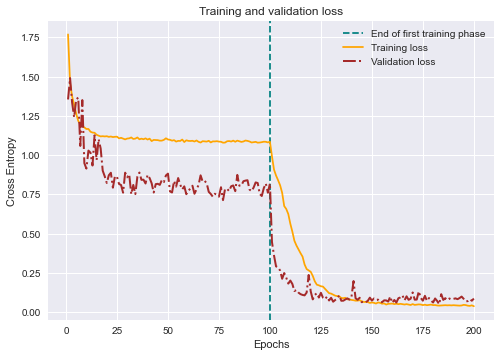

In [19]:
losses = {'loss':fc32_info['loss'], 
          'val_loss':fc32_info['val_loss']}
plotLoss(losses, 'Cross Entropy', ep_first_phase=fc32_info['secPhase'])

## 2) 64 neurons in fully connected layer

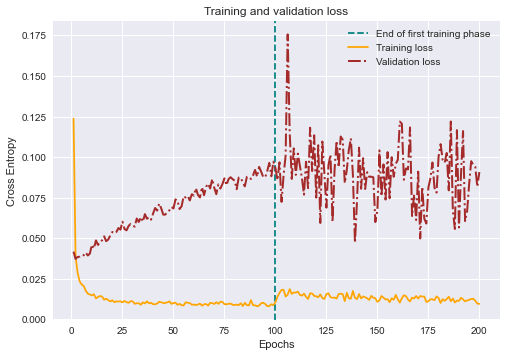

In [20]:
losses = {'loss':fc64_info['loss'], 
          'val_loss':fc64_info['val_loss']}
plotLoss(losses, 'Cross Entropy', ep_first_phase=fc64_info['secPhase'])

## 3) 128 neurons in fully connected layer

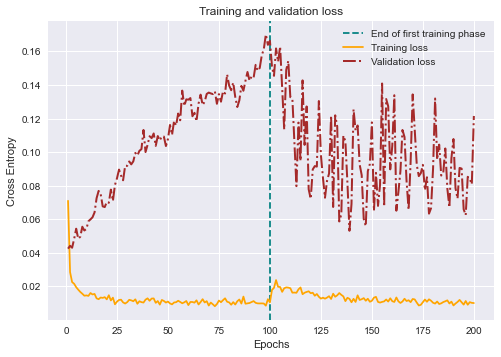

In [21]:
losses = {'loss':fc128_info['loss'], 
          'val_loss':fc128_info['val_loss']}
plotLoss(losses, 'Cross Entropy', ep_first_phase=fc128_info['secPhase'])

## 4) 256 neurons in fully connected layer

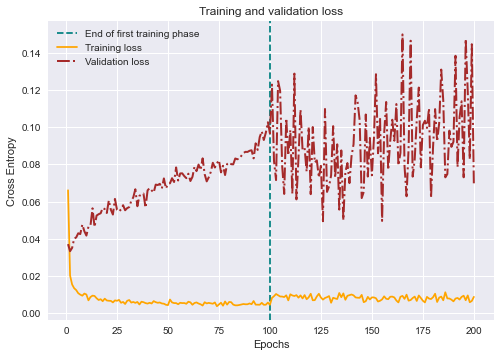

In [22]:
losses = {'loss':fc256_info['loss'], 
          'val_loss':fc256_info['val_loss']}
plotLoss(losses, 'Cross Entropy', ep_first_phase=fc256_info['secPhase'])

## Plotting with the same scale for better comparison

In [43]:
%matplotlib qt
plotAll(saves)

## From the above we can tell that using a fully connected layer with only 32 nodes is not enough to reach the optimal results with just training the fully connected layer's weights. This occurs because the layer and thus the model is not complex enough to derive all the useful information from the train set and for this reason it needs more time, i.e. more epochs, to converge to the optimal loss

## As far as overfitting is concerned we can clearly tell that the dropout policy we used in all models works very well and manages to prevent overfitting as validation loss is always close to the training loss. Moreover the fact that increasing the fully connected layer's neurons from 64 up to 128 or even up to 256, i.e. making the model more complex and more prone to overfitting, yields approximately the same fluctuations in training and validation losses justifies our dropout policy even more.

## To conclude, since going for more than 64 neurons doesn't yield us better results we consider this number as the best value for the corresponding hyperparameter

# Research upon different dropout techniques and no dropout at all

## All models below were trained with batches of size 64 and a fully connected layer with 64 nodes, dropout probabilities were 0.2 after convolution layers and 0.5 after the fully connected layer, these values were found to be proposed and tested in below papers.

## Links:
###  https://arxiv.org/pdf/1207.0580.pdf
### http://mipal.snu.ac.kr/images/1/16/Dropout_ACCV2016.pdf

### Paths

In [24]:
models_dir = 'classifier_models/'

# files with models
nodrop_fname = 'no_drop.h5'
dropconv_fname = 'drop_conv.h5'
dropfc_fname = 'drop_fc.h5'
dropfull_fname = 'drop_full.h5'

# files with json info
nodrop_inf_fname = 'no_drop.json'
dropconv_inf_fname = 'drop_conv.json'
dropfc_inf_fname = 'drop_fc.json'
dropfull_inf_fname = 'drop_full.json'

## 1) No dropout

### Architecture

In [25]:
model = models.load_model(models_dir + nodrop_fname, compile= False)
model.summary()

Model: "N2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640     

### Training of fully connected layer's weights

In [26]:
fc_train = \
'''
Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 0.2433 - val_loss: 0.1721
Epoch 2/100
750/750 [==============================] - 2s 2ms/step - loss: 0.1273 - val_loss: 0.1327
Epoch 3/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0905 - val_loss: 0.1154
Epoch 4/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0765 - val_loss: 0.1394
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0629 - val_loss: 0.1235
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0573 - val_loss: 0.1151
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0485 - val_loss: 0.1294
Epoch 8/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0432 - val_loss: 0.1519
Epoch 9/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0403 - val_loss: 0.1586
Epoch 10/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0321 - val_loss: 0.1301
Epoch 11/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0297 - val_loss: 0.1488
Epoch 12/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0266 - val_loss: 0.1491
Epoch 13/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0300 - val_loss: 0.1501
Epoch 14/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0260 - val_loss: 0.1785
Epoch 15/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0231 - val_loss: 0.1428
Epoch 16/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0227 - val_loss: 0.1663
Epoch 17/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0227 - val_loss: 0.1649
Epoch 18/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0169 - val_loss: 0.1809
Epoch 19/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0213 - val_loss: 0.1739
Epoch 20/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0183 - val_loss: 0.1726
Epoch 21/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0173 - val_loss: 0.2295
Epoch 22/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0161 - val_loss: 0.1935
Epoch 23/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0138 - val_loss: 0.1830
Epoch 24/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0166 - val_loss: 0.2004
Epoch 25/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0160 - val_loss: 0.2013
Epoch 26/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0158 - val_loss: 0.1812
Epoch 27/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0153 - val_loss: 0.2252
Epoch 28/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0143 - val_loss: 0.2419
Epoch 29/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0124 - val_loss: 0.1967
Epoch 30/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0144 - val_loss: 0.2656
Epoch 31/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0141 - val_loss: 0.2370
Epoch 32/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0093 - val_loss: 0.2383
Epoch 33/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0128 - val_loss: 0.2360
Epoch 34/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0119 - val_loss: 0.2053
Epoch 35/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0128 - val_loss: 0.2368
Epoch 36/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0102 - val_loss: 0.2384
Epoch 37/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0148 - val_loss: 0.2418
Epoch 38/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0094 - val_loss: 0.2499
Epoch 39/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0095 - val_loss: 0.2540
Epoch 40/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0135 - val_loss: 0.2806
Epoch 41/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0100 - val_loss: 0.2673
Epoch 42/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0127 - val_loss: 0.2556
Epoch 43/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0089 - val_loss: 0.2869
Epoch 44/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0070 - val_loss: 0.2926
Epoch 45/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0132 - val_loss: 0.2741
Epoch 46/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0135 - val_loss: 0.2974
Epoch 47/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0100 - val_loss: 0.2857
Epoch 48/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0103 - val_loss: 0.2801
Epoch 49/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0085 - val_loss: 0.2715
Epoch 50/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0096 - val_loss: 0.2851
Epoch 51/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0096 - val_loss: 0.2726
Epoch 52/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0082 - val_loss: 0.2862
Epoch 53/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0090 - val_loss: 0.2931
Epoch 54/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0101 - val_loss: 0.3025
Epoch 55/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0078 - val_loss: 0.2768
Epoch 56/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0094 - val_loss: 0.3139
Epoch 57/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0059 - val_loss: 0.2855
Epoch 58/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0072 - val_loss: 0.3517
Epoch 59/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0119 - val_loss: 0.3123
Epoch 60/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0109 - val_loss: 0.3402
Epoch 61/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0083 - val_loss: 0.3115
Epoch 62/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0054 - val_loss: 0.3230
Epoch 63/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0090 - val_loss: 0.3869
Epoch 64/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0098 - val_loss: 0.3207
Epoch 65/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0091 - val_loss: 0.4169
Epoch 66/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0090 - val_loss: 0.3166
Epoch 67/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0047 - val_loss: 0.3642
Epoch 68/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0080 - val_loss: 0.3586
Epoch 69/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0115 - val_loss: 0.3076
Epoch 70/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0055 - val_loss: 0.3447
Epoch 71/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0078 - val_loss: 0.3544
Epoch 72/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0092 - val_loss: 0.3661
Epoch 73/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0093 - val_loss: 0.3679
Epoch 74/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0086 - val_loss: 0.3557
Epoch 75/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0120 - val_loss: 0.4089
Epoch 76/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0053 - val_loss: 0.3700
Epoch 77/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0051 - val_loss: 0.3388
Epoch 78/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0116 - val_loss: 0.4126
Epoch 79/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0059 - val_loss: 0.3776
Epoch 80/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0078 - val_loss: 0.4380
Epoch 81/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0087 - val_loss: 0.3752
Epoch 82/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0041 - val_loss: 0.3904
Epoch 83/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0076 - val_loss: 0.3703
Epoch 84/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0044 - val_loss: 0.4467
Epoch 85/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0107 - val_loss: 0.4025
Epoch 86/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0088 - val_loss: 0.3700
Epoch 87/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0035 - val_loss: 0.3433
Epoch 88/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0104 - val_loss: 0.4447
Epoch 89/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0097 - val_loss: 0.3786
Epoch 90/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0045 - val_loss: 0.3805
Epoch 91/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0077 - val_loss: 0.4039
Epoch 92/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0092 - val_loss: 0.4381
Epoch 93/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0027 - val_loss: 0.3942
Epoch 94/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0073 - val_loss: 0.3722
Epoch 95/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0105 - val_loss: 0.4053
Epoch 96/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0080 - val_loss: 0.4144
Epoch 97/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0089 - val_loss: 0.4421
Epoch 98/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0059 - val_loss: 0.3961
Epoch 99/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0055 - val_loss: 0.4929
Epoch 100/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0067 - val_loss: 0.4372
'''

### Training of all weights

In [27]:
all_train = \
'''
Epoch 1/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0565 - val_loss: 0.4152
Epoch 2/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0546 - val_loss: 0.3784
Epoch 3/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0418 - val_loss: 0.3268
Epoch 4/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0310 - val_loss: 0.3733
Epoch 5/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0278 - val_loss: 0.3685
Epoch 6/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0296 - val_loss: 0.3256
Epoch 7/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0384 - val_loss: 0.3205
Epoch 8/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0252 - val_loss: 0.2823
Epoch 9/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0247 - val_loss: 0.2602
Epoch 10/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0168 - val_loss: 0.3894
Epoch 11/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0224 - val_loss: 0.3641
Epoch 12/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0197 - val_loss: 0.3031
Epoch 13/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0170 - val_loss: 0.2786
Epoch 14/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0217 - val_loss: 0.2959
Epoch 15/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0139 - val_loss: 0.2611
Epoch 16/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0163 - val_loss: 0.2465
Epoch 17/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0145 - val_loss: 0.2715
Epoch 18/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0127 - val_loss: 0.2351
Epoch 19/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0167 - val_loss: 0.2592
Epoch 20/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0132 - val_loss: 0.2688
Epoch 21/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0112 - val_loss: 0.2552
Epoch 22/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0158 - val_loss: 0.2337
Epoch 23/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0106 - val_loss: 0.2260
Epoch 24/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0106 - val_loss: 0.2423
Epoch 25/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0082 - val_loss: 0.2715
Epoch 26/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0107 - val_loss: 0.2996
Epoch 27/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0100 - val_loss: 0.2090
Epoch 28/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0092 - val_loss: 0.2528
Epoch 29/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0065 - val_loss: 0.2134
Epoch 30/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0096 - val_loss: 0.2382
Epoch 31/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0074 - val_loss: 0.1946
Epoch 32/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0063 - val_loss: 0.1972
Epoch 33/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0084 - val_loss: 0.2278
Epoch 34/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0101 - val_loss: 0.2366
Epoch 35/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0049 - val_loss: 0.2259
Epoch 36/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0100 - val_loss: 0.2177
Epoch 37/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0089 - val_loss: 0.2216
Epoch 38/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0057 - val_loss: 0.2180
Epoch 39/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0079 - val_loss: 0.2226
Epoch 40/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0074 - val_loss: 0.2209
Epoch 41/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0085 - val_loss: 0.2051
Epoch 42/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0049 - val_loss: 0.1811
Epoch 43/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0038 - val_loss: 0.2120
Epoch 44/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0071 - val_loss: 0.2025
Epoch 45/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0071 - val_loss: 0.2125
Epoch 46/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0048 - val_loss: 0.1985
Epoch 47/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0065 - val_loss: 0.2195
Epoch 48/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0045 - val_loss: 0.1902
Epoch 49/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0070 - val_loss: 0.2022
Epoch 50/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0040 - val_loss: 0.1917
Epoch 51/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0033 - val_loss: 0.2056
Epoch 52/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0077 - val_loss: 0.1966
Epoch 53/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0047 - val_loss: 0.2157
Epoch 54/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0042 - val_loss: 0.2188
Epoch 55/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0042 - val_loss: 0.1874
Epoch 56/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0024 - val_loss: 0.2094
Epoch 57/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0065 - val_loss: 0.1878
Epoch 58/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0041 - val_loss: 0.2203
Epoch 59/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0037 - val_loss: 0.1683
Epoch 60/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0017 - val_loss: 0.1989
Epoch 61/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0035 - val_loss: 0.1799
Epoch 62/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0035 - val_loss: 0.2205
Epoch 63/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0046 - val_loss: 0.2145
Epoch 64/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0052 - val_loss: 0.2213
Epoch 65/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0027 - val_loss: 0.2143
Epoch 66/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0040 - val_loss: 0.2023
Epoch 67/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0026 - val_loss: 0.1816
Epoch 68/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0023 - val_loss: 0.2564
Epoch 69/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0067 - val_loss: 0.1868
Epoch 70/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0016 - val_loss: 0.1764
Epoch 71/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0042 - val_loss: 0.1829
Epoch 72/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0026 - val_loss: 0.2005
Epoch 73/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0029 - val_loss: 0.2381
Epoch 74/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0063 - val_loss: 0.1758
Epoch 75/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0019 - val_loss: 0.2029
Epoch 76/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0023 - val_loss: 0.1939
Epoch 77/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0028 - val_loss: 0.1902
Epoch 78/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0050 - val_loss: 0.2252
Epoch 79/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0024 - val_loss: 0.2000
Epoch 80/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0040 - val_loss: 0.1997
Epoch 81/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0032 - val_loss: 0.2035
Epoch 82/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0034 - val_loss: 0.1830
Epoch 83/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0032 - val_loss: 0.1826
Epoch 84/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0016 - val_loss: 0.1847
Epoch 85/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0029 - val_loss: 0.1817
Epoch 86/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0044 - val_loss: 0.1890
Epoch 87/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0021 - val_loss: 0.1770
Epoch 88/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0022 - val_loss: 0.1661
Epoch 89/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0025 - val_loss: 0.1899
Epoch 90/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0034 - val_loss: 0.1708
Epoch 91/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0016 - val_loss: 0.1703
Epoch 92/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0016 - val_loss: 0.1849
Epoch 93/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0036 - val_loss: 0.1766
Epoch 94/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0031 - val_loss: 0.2087
Epoch 95/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0022 - val_loss: 0.1740
Epoch 96/100
750/750 [==============================] - 3s 4ms/step - loss: 2.5445e-04 - val_loss: 0.1628
Epoch 97/100
750/750 [==============================] - 3s 4ms/step - loss: 9.9452e-05 - val_loss: 0.1706
Epoch 98/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0040 - val_loss: 0.1978
Epoch 99/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0045 - val_loss: 0.1850
Epoch 100/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0024 - val_loss: 0.1861
'''

## 2) Dropout after convolution layers

### Architecture

In [28]:
model = models.load_model(models_dir + dropconv_fname, compile= False)
model.summary()

Model: "N2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64       

### Training of fully connected layer's weights

In [29]:
fc_train = \
'''
Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: 0.1458 - val_loss: 0.0824
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0761 - val_loss: 0.0629
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0659 - val_loss: 0.0626
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0584 - val_loss: 0.0657
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0515 - val_loss: 0.0574
Epoch 6/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0495 - val_loss: 0.0606
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0464 - val_loss: 0.0642
Epoch 8/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0415 - val_loss: 0.0595
Epoch 9/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0389 - val_loss: 0.0612
Epoch 10/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0373 - val_loss: 0.0561
Epoch 11/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0359 - val_loss: 0.0567
Epoch 12/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0371 - val_loss: 0.0640
Epoch 13/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0374 - val_loss: 0.0606
Epoch 14/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0323 - val_loss: 0.0635
Epoch 15/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0322 - val_loss: 0.0662
Epoch 16/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0300 - val_loss: 0.0581
Epoch 17/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0313 - val_loss: 0.0727
Epoch 18/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0309 - val_loss: 0.0661
Epoch 19/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0257 - val_loss: 0.0650
Epoch 20/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0291 - val_loss: 0.0615
Epoch 21/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0285 - val_loss: 0.0681
Epoch 22/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0274 - val_loss: 0.0645
Epoch 23/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0250 - val_loss: 0.0605
Epoch 24/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0240 - val_loss: 0.0712
Epoch 25/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0264 - val_loss: 0.0652
Epoch 26/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0269 - val_loss: 0.0739
Epoch 27/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0245 - val_loss: 0.0692
Epoch 28/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0252 - val_loss: 0.0683
Epoch 29/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0259 - val_loss: 0.0667
Epoch 30/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0238 - val_loss: 0.0684
Epoch 31/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0235 - val_loss: 0.0711
Epoch 32/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0237 - val_loss: 0.0743
Epoch 33/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0225 - val_loss: 0.0703
Epoch 34/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0227 - val_loss: 0.0676
Epoch 35/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0217 - val_loss: 0.0721
Epoch 36/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0232 - val_loss: 0.0675
Epoch 37/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0225 - val_loss: 0.0759
Epoch 38/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0214 - val_loss: 0.0821
Epoch 39/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0232 - val_loss: 0.0793
Epoch 40/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0194 - val_loss: 0.0728
Epoch 41/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0201 - val_loss: 0.0728
Epoch 42/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0231 - val_loss: 0.0777
Epoch 43/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0215 - val_loss: 0.0732
Epoch 44/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0217 - val_loss: 0.0727
Epoch 45/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0193 - val_loss: 0.0731
Epoch 46/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0210 - val_loss: 0.0833
Epoch 47/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0214 - val_loss: 0.0741
Epoch 48/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0208 - val_loss: 0.0791
Epoch 49/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0170 - val_loss: 0.0768
Epoch 50/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0192 - val_loss: 0.0830
Epoch 51/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0198 - val_loss: 0.0706
Epoch 52/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0206 - val_loss: 0.0721
Epoch 53/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0203 - val_loss: 0.0715
Epoch 54/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0188 - val_loss: 0.0730
Epoch 55/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0196 - val_loss: 0.0807
Epoch 56/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0201 - val_loss: 0.0648
Epoch 57/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0201 - val_loss: 0.0704
Epoch 58/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0190 - val_loss: 0.0729
Epoch 59/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0187 - val_loss: 0.0829
Epoch 60/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0220 - val_loss: 0.0722
Epoch 61/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0190 - val_loss: 0.0767
Epoch 62/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0200 - val_loss: 0.0741
Epoch 63/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0174 - val_loss: 0.0725
Epoch 64/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0203 - val_loss: 0.0856
Epoch 65/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0177 - val_loss: 0.0857
Epoch 66/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0179 - val_loss: 0.0799
Epoch 67/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0173 - val_loss: 0.0879
Epoch 68/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0191 - val_loss: 0.0875
Epoch 69/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0202 - val_loss: 0.0716
Epoch 70/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0177 - val_loss: 0.0776
Epoch 71/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0173 - val_loss: 0.0833
Epoch 72/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0198 - val_loss: 0.0691
Epoch 73/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0178 - val_loss: 0.0873
Epoch 74/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0197 - val_loss: 0.0835
Epoch 75/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0179 - val_loss: 0.0843
Epoch 76/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0182 - val_loss: 0.0715
Epoch 77/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0172 - val_loss: 0.0725
Epoch 78/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0170 - val_loss: 0.0725
Epoch 79/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0175 - val_loss: 0.0793
Epoch 80/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0170 - val_loss: 0.0784
Epoch 81/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0159 - val_loss: 0.0749
Epoch 82/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0178 - val_loss: 0.0805
Epoch 83/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0185 - val_loss: 0.0762
Epoch 84/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0176 - val_loss: 0.0820
Epoch 85/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0166 - val_loss: 0.0815
Epoch 86/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0167 - val_loss: 0.0809
Epoch 87/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0178 - val_loss: 0.0860
Epoch 88/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0166 - val_loss: 0.0744
Epoch 89/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0187 - val_loss: 0.0754
Epoch 90/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0177 - val_loss: 0.0722
Epoch 91/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0154 - val_loss: 0.0696
Epoch 92/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0174 - val_loss: 0.0753
Epoch 93/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0173 - val_loss: 0.0783
Epoch 94/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0151 - val_loss: 0.0774
Epoch 95/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0157 - val_loss: 0.0757
Epoch 96/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0177 - val_loss: 0.0784
Epoch 97/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0175 - val_loss: 0.0855
Epoch 98/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0165 - val_loss: 0.0710
Epoch 99/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0179 - val_loss: 0.0804
Epoch 100/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0166 - val_loss: 0.0772
'''

### Training of all weights

In [30]:
all_train = \
'''
Epoch 1/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0144 - val_loss: 0.0675
Epoch 2/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0119 - val_loss: 0.0580
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0111 - val_loss: 0.0596
Epoch 4/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0094 - val_loss: 0.0593
Epoch 5/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0102 - val_loss: 0.0633
Epoch 6/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0095 - val_loss: 0.0612
Epoch 7/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0099 - val_loss: 0.0542
Epoch 8/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0086 - val_loss: 0.0719
Epoch 9/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0088 - val_loss: 0.0629
Epoch 10/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0092 - val_loss: 0.0663
Epoch 11/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0085 - val_loss: 0.0623
Epoch 12/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0069 - val_loss: 0.0672
Epoch 13/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0089 - val_loss: 0.0654
Epoch 14/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0075 - val_loss: 0.0649
Epoch 15/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0073 - val_loss: 0.0702
Epoch 16/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0065 - val_loss: 0.0636
Epoch 17/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0089 - val_loss: 0.0632
Epoch 18/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0072 - val_loss: 0.0790
Epoch 19/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0063 - val_loss: 0.0690
Epoch 20/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0071 - val_loss: 0.0641
Epoch 21/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0077 - val_loss: 0.0815
Epoch 22/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0081 - val_loss: 0.0681
Epoch 23/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0056 - val_loss: 0.0684
Epoch 24/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0060 - val_loss: 0.0731
Epoch 25/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0071 - val_loss: 0.0673
Epoch 26/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0069 - val_loss: 0.0721
Epoch 27/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0052 - val_loss: 0.0686
Epoch 28/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0074 - val_loss: 0.0942
Epoch 29/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0056 - val_loss: 0.0856
Epoch 30/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0061 - val_loss: 0.0671
Epoch 31/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0058 - val_loss: 0.0673
Epoch 32/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0060 - val_loss: 0.0677
Epoch 33/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0042 - val_loss: 0.0665
Epoch 34/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0051 - val_loss: 0.0794
Epoch 35/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0065 - val_loss: 0.0729
Epoch 36/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0057 - val_loss: 0.0865
Epoch 37/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0058 - val_loss: 0.0634
Epoch 38/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0058 - val_loss: 0.0674
Epoch 39/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0054 - val_loss: 0.0779
Epoch 40/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0046 - val_loss: 0.0773
Epoch 41/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0041 - val_loss: 0.0777
Epoch 42/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0056 - val_loss: 0.0755
Epoch 43/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0049 - val_loss: 0.0721
Epoch 44/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0044 - val_loss: 0.0628
Epoch 45/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0037 - val_loss: 0.0823
Epoch 46/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0065 - val_loss: 0.0744
Epoch 47/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0052 - val_loss: 0.0811
Epoch 48/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0049 - val_loss: 0.0816
Epoch 49/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0056 - val_loss: 0.0792
Epoch 50/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0039 - val_loss: 0.0757
Epoch 51/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0054 - val_loss: 0.0748
Epoch 52/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0038 - val_loss: 0.0727
Epoch 53/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0047 - val_loss: 0.0666
Epoch 54/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0049 - val_loss: 0.0960
Epoch 55/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0040 - val_loss: 0.1029
Epoch 56/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0045 - val_loss: 0.0793
Epoch 57/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0036 - val_loss: 0.0922
Epoch 58/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0042 - val_loss: 0.0958
Epoch 59/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0050 - val_loss: 0.0884
Epoch 60/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0037 - val_loss: 0.0866
Epoch 61/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0038 - val_loss: 0.0748
Epoch 62/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0036 - val_loss: 0.0836
Epoch 63/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0039 - val_loss: 0.0866
Epoch 64/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0052 - val_loss: 0.0729
Epoch 65/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0036 - val_loss: 0.0708
Epoch 66/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0039 - val_loss: 0.0751
Epoch 67/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0032 - val_loss: 0.0648
Epoch 68/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0046 - val_loss: 0.0751
Epoch 69/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0029 - val_loss: 0.0932
Epoch 70/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0033 - val_loss: 0.0909
Epoch 71/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0045 - val_loss: 0.0831
Epoch 72/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0053 - val_loss: 0.1155
Epoch 73/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0036 - val_loss: 0.0930
Epoch 74/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0028 - val_loss: 0.0867
Epoch 75/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0049 - val_loss: 0.0674
Epoch 76/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0037 - val_loss: 0.0693
Epoch 77/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0031 - val_loss: 0.0624
Epoch 78/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0040 - val_loss: 0.0824
Epoch 79/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0041 - val_loss: 0.0760
Epoch 80/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0034 - val_loss: 0.1092
Epoch 81/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0035 - val_loss: 0.0773
Epoch 82/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0037 - val_loss: 0.0816
Epoch 83/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0035 - val_loss: 0.1014
Epoch 84/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0027 - val_loss: 0.0789
Epoch 85/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0028 - val_loss: 0.0869
Epoch 86/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0049 - val_loss: 0.0809
Epoch 87/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0037 - val_loss: 0.0760
Epoch 88/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0037 - val_loss: 0.0839
Epoch 89/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0035 - val_loss: 0.0789
Epoch 90/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0032 - val_loss: 0.0969
Epoch 91/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0025 - val_loss: 0.0854
Epoch 92/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0039 - val_loss: 0.0757
Epoch 93/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0034 - val_loss: 0.0919
Epoch 94/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0037 - val_loss: 0.0808
Epoch 95/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0030 - val_loss: 0.0831
Epoch 96/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0030 - val_loss: 0.0852
Epoch 97/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0033 - val_loss: 0.0756
Epoch 98/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0031 - val_loss: 0.0912
Epoch 99/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0043 - val_loss: 0.0935
Epoch 100/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0037 - val_loss: 0.0911
'''

## 3) Dropout after fully connected layer

### Architecture

In [31]:
model = models.load_model(models_dir + dropfc_fname, compile= False)
model.summary()

Model: "N2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640     

### Training of fully connected layer's weights

In [32]:
fc_train = \
'''
Epoch 1/100
750/750 [==============================] - 2s 2ms/step - loss: 0.1560 - val_loss: 0.0507
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0646 - val_loss: 0.0454
Epoch 3/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0501 - val_loss: 0.0415
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0422 - val_loss: 0.0469
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0340 - val_loss: 0.0412
Epoch 6/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0315 - val_loss: 0.0460
Epoch 7/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0284 - val_loss: 0.0470
Epoch 8/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0262 - val_loss: 0.0476
Epoch 9/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0231 - val_loss: 0.0477
Epoch 10/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0227 - val_loss: 0.0454
Epoch 11/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0206 - val_loss: 0.0512
Epoch 12/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0197 - val_loss: 0.0544
Epoch 13/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0182 - val_loss: 0.0552
Epoch 14/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0177 - val_loss: 0.0513
Epoch 15/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0167 - val_loss: 0.0537
Epoch 16/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0152 - val_loss: 0.0539
Epoch 17/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0158 - val_loss: 0.0617
Epoch 18/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0149 - val_loss: 0.0575
Epoch 19/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0142 - val_loss: 0.0593
Epoch 20/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0142 - val_loss: 0.0625
Epoch 21/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0130 - val_loss: 0.0637
Epoch 22/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0135 - val_loss: 0.0631
Epoch 23/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0124 - val_loss: 0.0637
Epoch 24/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0131 - val_loss: 0.0686
Epoch 25/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0111 - val_loss: 0.0720
Epoch 26/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0132 - val_loss: 0.0719
Epoch 27/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0112 - val_loss: 0.0668
Epoch 28/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0105 - val_loss: 0.0732
Epoch 29/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0103 - val_loss: 0.0727
Epoch 30/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0109 - val_loss: 0.0765
Epoch 31/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0124 - val_loss: 0.0829
Epoch 32/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0106 - val_loss: 0.0770
Epoch 33/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0118 - val_loss: 0.0847
Epoch 34/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0109 - val_loss: 0.0811
Epoch 35/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0098 - val_loss: 0.0793
Epoch 36/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0104 - val_loss: 0.0799
Epoch 37/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0104 - val_loss: 0.0777
Epoch 38/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0089 - val_loss: 0.0816
Epoch 39/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0073 - val_loss: 0.0802
Epoch 40/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0099 - val_loss: 0.0779
Epoch 41/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0094 - val_loss: 0.0856
Epoch 42/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0096 - val_loss: 0.0891
Epoch 43/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0091 - val_loss: 0.0823
Epoch 44/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0086 - val_loss: 0.0830
Epoch 45/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0095 - val_loss: 0.0866
Epoch 46/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0089 - val_loss: 0.0906
Epoch 47/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0085 - val_loss: 0.0904
Epoch 48/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0098 - val_loss: 0.0841
Epoch 49/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0091 - val_loss: 0.0881
Epoch 50/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0085 - val_loss: 0.0943
Epoch 51/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0091 - val_loss: 0.0965
Epoch 52/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0078 - val_loss: 0.1015
Epoch 53/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0081 - val_loss: 0.1006
Epoch 54/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0081 - val_loss: 0.0996
Epoch 55/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0070 - val_loss: 0.0970
Epoch 56/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0084 - val_loss: 0.0971
Epoch 57/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0083 - val_loss: 0.0916
Epoch 58/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0099 - val_loss: 0.0950
Epoch 59/100
750/750 [==============================] - 3s 3ms/step - loss: 0.0075 - val_loss: 0.0945
Epoch 60/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0077 - val_loss: 0.1001
Epoch 61/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0075 - val_loss: 0.1020
Epoch 62/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0079 - val_loss: 0.0983
Epoch 63/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0078 - val_loss: 0.1090
Epoch 64/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0080 - val_loss: 0.0966
Epoch 65/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0077 - val_loss: 0.0951
Epoch 66/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0079 - val_loss: 0.1036
Epoch 67/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0067 - val_loss: 0.1076
Epoch 68/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0084 - val_loss: 0.1122
Epoch 69/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0070 - val_loss: 0.1084
Epoch 70/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0087 - val_loss: 0.1076
Epoch 71/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0071 - val_loss: 0.1012
Epoch 72/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0067 - val_loss: 0.1104
Epoch 73/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0066 - val_loss: 0.1070
Epoch 74/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0076 - val_loss: 0.0993
Epoch 75/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0076 - val_loss: 0.1127
Epoch 76/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0066 - val_loss: 0.1171
Epoch 77/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0069 - val_loss: 0.1151
Epoch 78/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0076 - val_loss: 0.1075
Epoch 79/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0071 - val_loss: 0.1179
Epoch 80/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0071 - val_loss: 0.1070
Epoch 81/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0076 - val_loss: 0.1078
Epoch 82/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0074 - val_loss: 0.1083
Epoch 83/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0084 - val_loss: 0.1168
Epoch 84/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0082 - val_loss: 0.1111
Epoch 85/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0051 - val_loss: 0.1181
Epoch 86/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0064 - val_loss: 0.1179
Epoch 87/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0084 - val_loss: 0.1064
Epoch 88/100
750/750 [==============================] - 1s 2ms/step - loss: 0.0058 - val_loss: 0.1130
Epoch 89/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0068 - val_loss: 0.1148
Epoch 90/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0078 - val_loss: 0.1166
Epoch 91/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0063 - val_loss: 0.1107
Epoch 92/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0064 - val_loss: 0.1249
Epoch 93/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0067 - val_loss: 0.1198
Epoch 94/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0076 - val_loss: 0.1197
Epoch 95/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0083 - val_loss: 0.1215
Epoch 96/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0058 - val_loss: 0.1208
Epoch 97/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0085 - val_loss: 0.1146
Epoch 98/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0060 - val_loss: 0.1082
Epoch 99/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0069 - val_loss: 0.1277
Epoch 100/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0082 - val_loss: 0.1287
'''

### Training of all weights

In [33]:
all_train = \
'''
Epoch 1/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0156 - val_loss: 0.1459
Epoch 2/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0147 - val_loss: 0.1443
Epoch 3/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0093 - val_loss: 0.1440
Epoch 4/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0114 - val_loss: 0.1532
Epoch 5/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0115 - val_loss: 0.1288
Epoch 6/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0108 - val_loss: 0.1371
Epoch 7/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0098 - val_loss: 0.1570
Epoch 8/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0103 - val_loss: 0.1300
Epoch 9/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0098 - val_loss: 0.1682
Epoch 10/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0085 - val_loss: 0.1319
Epoch 11/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0110 - val_loss: 0.1151
Epoch 12/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0104 - val_loss: 0.1279
Epoch 13/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0115 - val_loss: 0.1298
Epoch 14/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0087 - val_loss: 0.1216
Epoch 15/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0082 - val_loss: 0.1228
Epoch 16/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0100 - val_loss: 0.1094
Epoch 17/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0095 - val_loss: 0.1714
Epoch 18/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0094 - val_loss: 0.1597
Epoch 19/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0096 - val_loss: 0.0993
Epoch 20/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0083 - val_loss: 0.1210
Epoch 21/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0097 - val_loss: 0.1339
Epoch 22/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0091 - val_loss: 0.1300
Epoch 23/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0098 - val_loss: 0.1299
Epoch 24/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0093 - val_loss: 0.1167
Epoch 25/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0083 - val_loss: 0.1558
Epoch 26/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0081 - val_loss: 0.1120
Epoch 27/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0086 - val_loss: 0.1021
Epoch 28/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0078 - val_loss: 0.1088
Epoch 29/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0097 - val_loss: 0.0973
Epoch 30/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0066 - val_loss: 0.1391
Epoch 31/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0070 - val_loss: 0.1426
Epoch 32/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0095 - val_loss: 0.1338
Epoch 33/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0095 - val_loss: 0.1109
Epoch 34/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0069 - val_loss: 0.1349
Epoch 35/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0081 - val_loss: 0.1210
Epoch 36/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0060 - val_loss: 0.1123
Epoch 37/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0086 - val_loss: 0.1077
Epoch 38/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0062 - val_loss: 0.1311
Epoch 39/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0070 - val_loss: 0.1105
Epoch 40/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0071 - val_loss: 0.1200
Epoch 41/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0078 - val_loss: 0.1038
Epoch 42/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0071 - val_loss: 0.1413
Epoch 43/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0080 - val_loss: 0.1403
Epoch 44/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0071 - val_loss: 0.1335
Epoch 45/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0073 - val_loss: 0.1087
Epoch 46/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0059 - val_loss: 0.1169
Epoch 47/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0059 - val_loss: 0.1283
Epoch 48/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0058 - val_loss: 0.1499
Epoch 49/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0077 - val_loss: 0.1410
Epoch 50/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0080 - val_loss: 0.1197
Epoch 51/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0068 - val_loss: 0.1263
Epoch 52/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0062 - val_loss: 0.1358
Epoch 53/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0065 - val_loss: 0.1144
Epoch 54/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0068 - val_loss: 0.1719
Epoch 55/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0094 - val_loss: 0.1121
Epoch 56/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0077 - val_loss: 0.1011
Epoch 57/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0059 - val_loss: 0.1233
Epoch 58/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0065 - val_loss: 0.1345
Epoch 59/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0073 - val_loss: 0.1319
Epoch 60/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0078 - val_loss: 0.1139
Epoch 61/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0066 - val_loss: 0.1150
Epoch 62/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0061 - val_loss: 0.1494
Epoch 63/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0051 - val_loss: 0.1507
Epoch 64/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0074 - val_loss: 0.1250
Epoch 65/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0057 - val_loss: 0.1317
Epoch 66/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0046 - val_loss: 0.1227
Epoch 67/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0057 - val_loss: 0.1247
Epoch 68/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0061 - val_loss: 0.1500
Epoch 69/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0067 - val_loss: 0.1680
Epoch 70/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0072 - val_loss: 0.1170
Epoch 71/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0055 - val_loss: 0.1302
Epoch 72/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0066 - val_loss: 0.1299
Epoch 73/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0052 - val_loss: 0.1649
Epoch 74/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0070 - val_loss: 0.1482
Epoch 75/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0065 - val_loss: 0.1069
Epoch 76/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0052 - val_loss: 0.1327
Epoch 77/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0067 - val_loss: 0.1301
Epoch 78/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0053 - val_loss: 0.1278
Epoch 79/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0077 - val_loss: 0.1153
Epoch 80/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0072 - val_loss: 0.1278
Epoch 81/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0056 - val_loss: 0.1849
Epoch 82/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0053 - val_loss: 0.1511
Epoch 83/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0056 - val_loss: 0.1648
Epoch 84/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0042 - val_loss: 0.1426
Epoch 85/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0046 - val_loss: 0.1559
Epoch 86/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0066 - val_loss: 0.1279
Epoch 87/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0069 - val_loss: 0.1525
Epoch 88/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0059 - val_loss: 0.1287
Epoch 89/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0060 - val_loss: 0.1392
Epoch 90/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0048 - val_loss: 0.1304
Epoch 91/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0058 - val_loss: 0.1421
Epoch 92/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0049 - val_loss: 0.1522
Epoch 93/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0055 - val_loss: 0.1557
Epoch 94/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0065 - val_loss: 0.1629
Epoch 95/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0051 - val_loss: 0.1534
Epoch 96/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0069 - val_loss: 0.1590
Epoch 97/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0054 - val_loss: 0.1399
Epoch 98/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0044 - val_loss: 0.1740
Epoch 99/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0058 - val_loss: 0.1480
Epoch 100/100
750/750 [==============================] - 3s 4ms/step - loss: 0.0068 - val_loss: 0.2016
'''

## 4) Dropout after convolution layers and fully connected layer

### Architecture

In [34]:
model = models.load_model(models_dir + dropfull_fname, compile= False)
model.summary()

Model: "N2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
dropout_7 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 16)        64       

### Training of fully connected layer's weights

In [35]:
fc_train = \
'''
Epoch 1/100
750/750 [==============================] - 2s 3ms/step - loss: 0.1638 - val_loss: 0.0463
Epoch 2/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0695 - val_loss: 0.0406
Epoch 3/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0581 - val_loss: 0.0404
Epoch 4/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0503 - val_loss: 0.0388
Epoch 5/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0474 - val_loss: 0.0385
Epoch 6/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0449 - val_loss: 0.0386
Epoch 7/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0413 - val_loss: 0.0394
Epoch 8/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0402 - val_loss: 0.0391
Epoch 9/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0368 - val_loss: 0.0407
Epoch 10/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0399 - val_loss: 0.0403
Epoch 11/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0364 - val_loss: 0.0418
Epoch 12/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0351 - val_loss: 0.0424
Epoch 13/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0358 - val_loss: 0.0434
Epoch 14/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0358 - val_loss: 0.0401
Epoch 15/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0341 - val_loss: 0.0420
Epoch 16/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0328 - val_loss: 0.0429
Epoch 17/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0335 - val_loss: 0.0426
Epoch 18/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0329 - val_loss: 0.0430
Epoch 19/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0320 - val_loss: 0.0432
Epoch 20/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0350 - val_loss: 0.0451
Epoch 21/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0308 - val_loss: 0.0450
Epoch 22/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0306 - val_loss: 0.0450
Epoch 23/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0302 - val_loss: 0.0414
Epoch 24/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0329 - val_loss: 0.0444
Epoch 25/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0305 - val_loss: 0.0453
Epoch 26/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0288 - val_loss: 0.0439
Epoch 27/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0287 - val_loss: 0.0473
Epoch 28/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0297 - val_loss: 0.0476
Epoch 29/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0311 - val_loss: 0.0474
Epoch 30/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0297 - val_loss: 0.0495
Epoch 31/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0270 - val_loss: 0.0475
Epoch 32/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0288 - val_loss: 0.0470
Epoch 33/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0290 - val_loss: 0.0458
Epoch 34/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0290 - val_loss: 0.0448
Epoch 35/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0262 - val_loss: 0.0470
Epoch 36/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0273 - val_loss: 0.0514
Epoch 37/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0309 - val_loss: 0.0451
Epoch 38/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0305 - val_loss: 0.0474
Epoch 39/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0266 - val_loss: 0.0525
Epoch 40/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0270 - val_loss: 0.0475
Epoch 41/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0271 - val_loss: 0.0488
Epoch 42/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0291 - val_loss: 0.0483
Epoch 43/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0286 - val_loss: 0.0485
Epoch 44/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0268 - val_loss: 0.0466
Epoch 45/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0269 - val_loss: 0.0510
Epoch 46/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0272 - val_loss: 0.0480
Epoch 47/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0263 - val_loss: 0.0464
Epoch 48/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0263 - val_loss: 0.0482
Epoch 49/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0273 - val_loss: 0.0489
Epoch 50/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0264 - val_loss: 0.0485
Epoch 51/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0255 - val_loss: 0.0512
Epoch 52/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0292 - val_loss: 0.0488
Epoch 53/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0242 - val_loss: 0.0500
Epoch 54/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0252 - val_loss: 0.0510
Epoch 55/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0281 - val_loss: 0.0498
Epoch 56/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0263 - val_loss: 0.0516
Epoch 57/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0275 - val_loss: 0.0503
Epoch 58/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0258 - val_loss: 0.0513
Epoch 59/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0249 - val_loss: 0.0549
Epoch 60/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0281 - val_loss: 0.0512
Epoch 61/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0262 - val_loss: 0.0484
Epoch 62/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0265 - val_loss: 0.0491
Epoch 63/100
750/750 [==============================] - 2s 2ms/step - loss: 0.0251 - val_loss: 0.0507
Epoch 64/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0258 - val_loss: 0.0498
Epoch 65/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0270 - val_loss: 0.0515
Epoch 66/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0281 - val_loss: 0.0493
Epoch 67/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0264 - val_loss: 0.0480
Epoch 68/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0263 - val_loss: 0.0481
Epoch 69/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0257 - val_loss: 0.0500
Epoch 70/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0264 - val_loss: 0.0496
Epoch 71/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0247 - val_loss: 0.0529
Epoch 72/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0268 - val_loss: 0.0489
Epoch 73/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0266 - val_loss: 0.0506
Epoch 74/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0254 - val_loss: 0.0506
Epoch 75/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0251 - val_loss: 0.0519
Epoch 76/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0252 - val_loss: 0.0490
Epoch 77/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0260 - val_loss: 0.0511
Epoch 78/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0253 - val_loss: 0.0484
Epoch 79/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0236 - val_loss: 0.0501
Epoch 80/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0273 - val_loss: 0.0515
Epoch 81/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0261 - val_loss: 0.0507
Epoch 82/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0250 - val_loss: 0.0516
Epoch 83/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0234 - val_loss: 0.0508
Epoch 84/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0250 - val_loss: 0.0496
Epoch 85/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0248 - val_loss: 0.0502
Epoch 86/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0259 - val_loss: 0.0517
Epoch 87/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0279 - val_loss: 0.0494
Epoch 88/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0262 - val_loss: 0.0488
Epoch 89/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0236 - val_loss: 0.0485
Epoch 90/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0258 - val_loss: 0.0498
Epoch 91/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0242 - val_loss: 0.0510
Epoch 92/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0226 - val_loss: 0.0477
Epoch 93/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0213 - val_loss: 0.0518
Epoch 94/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0245 - val_loss: 0.0522
Epoch 95/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0240 - val_loss: 0.0489
Epoch 96/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0253 - val_loss: 0.0505
Epoch 97/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0245 - val_loss: 0.0540
Epoch 98/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0242 - val_loss: 0.0501
Epoch 99/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0228 - val_loss: 0.0505
Epoch 100/100
750/750 [==============================] - 2s 3ms/step - loss: 0.0236 - val_loss: 0.0541
'''

### Training of all weights

In [36]:
all_train = \
'''
Epoch 1/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0283 - val_loss: 0.0629
Epoch 2/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0262 - val_loss: 0.0565
Epoch 3/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0232 - val_loss: 0.0704
Epoch 4/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0228 - val_loss: 0.0645
Epoch 5/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0240 - val_loss: 0.0692
Epoch 6/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0223 - val_loss: 0.0728
Epoch 7/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0237 - val_loss: 0.0521
Epoch 8/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0229 - val_loss: 0.0867
Epoch 9/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0237 - val_loss: 0.0959
Epoch 10/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0203 - val_loss: 0.0553
Epoch 11/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0227 - val_loss: 0.0647
Epoch 12/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0213 - val_loss: 0.0577
Epoch 13/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0201 - val_loss: 0.0835
Epoch 14/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0211 - val_loss: 0.0552
Epoch 15/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0223 - val_loss: 0.0660
Epoch 16/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0211 - val_loss: 0.0657
Epoch 17/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0207 - val_loss: 0.0632
Epoch 18/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0212 - val_loss: 0.0728
Epoch 19/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0195 - val_loss: 0.0840
Epoch 20/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0215 - val_loss: 0.0508
Epoch 21/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0196 - val_loss: 0.0633
Epoch 22/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0204 - val_loss: 0.0771
Epoch 23/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0219 - val_loss: 0.0697
Epoch 24/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0201 - val_loss: 0.0723
Epoch 25/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0183 - val_loss: 0.0915
Epoch 26/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0188 - val_loss: 0.0706
Epoch 27/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0196 - val_loss: 0.0856
Epoch 28/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0191 - val_loss: 0.0922
Epoch 29/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0176 - val_loss: 0.0735
Epoch 30/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0198 - val_loss: 0.0721
Epoch 31/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0186 - val_loss: 0.0710
Epoch 32/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0189 - val_loss: 0.0898
Epoch 33/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0193 - val_loss: 0.0996
Epoch 34/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0185 - val_loss: 0.0862
Epoch 35/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0170 - val_loss: 0.0946
Epoch 36/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0197 - val_loss: 0.0838
Epoch 37/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0178 - val_loss: 0.0694
Epoch 38/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0186 - val_loss: 0.0773
Epoch 39/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0170 - val_loss: 0.0941
Epoch 40/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0170 - val_loss: 0.0810
Epoch 41/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0166 - val_loss: 0.0585
Epoch 42/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0174 - val_loss: 0.0904
Epoch 43/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0178 - val_loss: 0.0563
Epoch 44/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0185 - val_loss: 0.0778
Epoch 45/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0180 - val_loss: 0.0908
Epoch 46/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0179 - val_loss: 0.0801
Epoch 47/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0187 - val_loss: 0.0729
Epoch 48/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0189 - val_loss: 0.0603
Epoch 49/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0171 - val_loss: 0.0856
Epoch 50/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0204 - val_loss: 0.0739
Epoch 51/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0161 - val_loss: 0.0861
Epoch 52/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0189 - val_loss: 0.0930
Epoch 53/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0179 - val_loss: 0.1193
Epoch 54/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0164 - val_loss: 0.1242
Epoch 55/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0161 - val_loss: 0.0996
Epoch 56/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0171 - val_loss: 0.0944
Epoch 57/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0166 - val_loss: 0.1023
Epoch 58/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0157 - val_loss: 0.0773
Epoch 59/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0151 - val_loss: 0.0782
Epoch 60/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0166 - val_loss: 0.0824
Epoch 61/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0148 - val_loss: 0.0882
Epoch 62/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0170 - val_loss: 0.0840
Epoch 63/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0151 - val_loss: 0.0976
Epoch 64/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0153 - val_loss: 0.0957
Epoch 65/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0170 - val_loss: 0.0719
Epoch 66/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0179 - val_loss: 0.0822
Epoch 67/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0147 - val_loss: 0.0705
Epoch 68/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0177 - val_loss: 0.0680
Epoch 69/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0143 - val_loss: 0.0871
Epoch 70/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0160 - val_loss: 0.0833
Epoch 71/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0170 - val_loss: 0.0752
Epoch 72/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0171 - val_loss: 0.0911
Epoch 73/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0156 - val_loss: 0.0929
Epoch 74/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0150 - val_loss: 0.0843
Epoch 75/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0161 - val_loss: 0.1004
Epoch 76/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0185 - val_loss: 0.0625
Epoch 77/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0172 - val_loss: 0.0768
Epoch 78/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0140 - val_loss: 0.0750
Epoch 79/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0166 - val_loss: 0.0993
Epoch 80/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0159 - val_loss: 0.0924
Epoch 81/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0163 - val_loss: 0.0774
Epoch 82/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0140 - val_loss: 0.0896
Epoch 83/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0174 - val_loss: 0.0676
Epoch 84/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0152 - val_loss: 0.0781
Epoch 85/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0166 - val_loss: 0.0804
Epoch 86/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0150 - val_loss: 0.1140
Epoch 87/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0129 - val_loss: 0.0754
Epoch 88/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0154 - val_loss: 0.0724
Epoch 89/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0153 - val_loss: 0.0930
Epoch 90/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0169 - val_loss: 0.0752
Epoch 91/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0135 - val_loss: 0.1006
Epoch 92/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0152 - val_loss: 0.0839
Epoch 93/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0156 - val_loss: 0.0764
Epoch 94/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0143 - val_loss: 0.0713
Epoch 95/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0157 - val_loss: 0.1056
Epoch 96/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0147 - val_loss: 0.1404
Epoch 97/100
750/750 [==============================] - 3s 5ms/step - loss: 0.0123 - val_loss: 0.1005
Epoch 98/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0152 - val_loss: 0.0902
Epoch 99/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0157 - val_loss: 0.1136
Epoch 100/100
750/750 [==============================] - 4s 5ms/step - loss: 0.0162 - val_loss: 0.1046
'''

### Below we load the models' training and validation losses during training along with hyperparameter values

In [37]:
import json

with open(models_dir + nodrop_inf_fname, 'r') as fl:
    nodrop_info = json.load(fl)
with open(models_dir + dropconv_inf_fname, 'r') as fl:
    dropconv_info = json.load(fl)
with open(models_dir + dropfc_inf_fname, 'r') as fl:
    dropfc_info = json.load(fl)
with open(models_dir + dropfull_inf_fname, 'r') as fl:
    dropfull_info = json.load(fl)
    
saves = [nodrop_info, dropconv_info, dropfc_info, dropfull_info]

## Training and validation losses over epochs

## 1) No Dropout

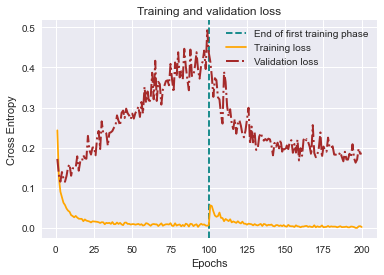

In [38]:
%matplotlib inline
losses = {'loss':nodrop_info['loss'], 
          'val_loss':nodrop_info['val_loss']}
plotLoss(losses, 'Cross Entropy', ep_first_phase=nodrop_info['secPhase'])

## 2) Dropout after convolution layers

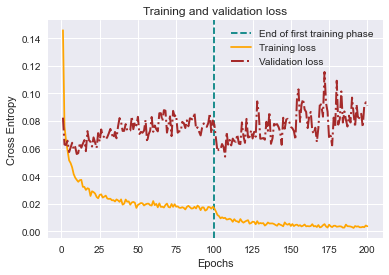

In [39]:
losses = {'loss':dropconv_info['loss'], 
          'val_loss':dropconv_info['val_loss']}
plotLoss(losses, 'Cross Entropy', ep_first_phase=dropconv_info['secPhase'])

## 3) Dropout after fully connected layer

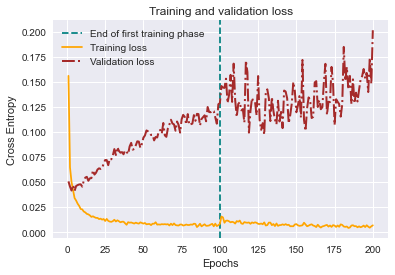

In [40]:
losses = {'loss':dropfc_info['loss'], 
          'val_loss':dropfc_info['val_loss']}
plotLoss(losses, 'Cross Entropy', ep_first_phase=dropfc_info['secPhase'])

## 4) Dropout after convolution layers and fully connected layer

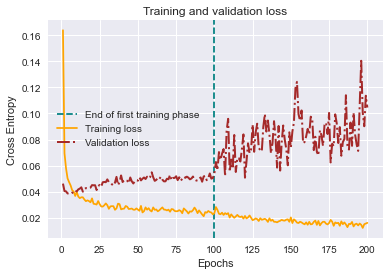

In [41]:
losses = {'loss':dropfull_info['loss'], 
          'val_loss':dropfull_info['val_loss']}
plotLoss(losses, 'Cross Entropy', ep_first_phase=dropfull_info['secPhase'])

## Plotting with the same scale for better comparison

In [45]:
%matplotlib qt
plotAll(saves, dropout_policies=['no_drop','drop_conv','drop_fc','drop_full'])

## From the above we can clearly see that some dropout must be used because otherwise overfitting occurs. Moreover, using dropout after convolution layers seems better than using dropout only after the fully connected layer. This is reasonable since we only have one fully connected layer in our model whereas we have convolution layers spread out across our model architecture.